In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency
from sklearn.cluster import KMeans
from sklearn.metrics import ConfusionMatrixDisplay

# Set the Seaborn style
sns.set()

In [2]:
clientInfo = pd.read_csv('credit_info_all.csv')

In [3]:
# Print the data type of the clientInfo variable
data_type = type(clientInfo)
print("Data type: ", data_type)

# Print the dimensions (shape) of the clientInfo DataFrame
data_dims = clientInfo.shape
print("Data dimensions: ", data_dims)


Data type:  <class 'pandas.core.frame.DataFrame'>
Data dimensions:  (20071, 21)


In [4]:
# Display the first 5 rows of the clientInfo DataFrame
clientInfo.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  712672083  Existing Customer            65      F                0   
1  713049933  Existing Customer            47      F                1   
2  713049933  Existing Customer            48      F                1   
3  713135883  Existing Customer            65      F                0   
4  713135883  Existing Customer            64      F                0   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married  Less than $40K          Blue   
1        Graduate        Married     $40K - $60K        Silver   
2        Graduate        Married     $40K - $60K        Silver   
3         College        Married  Less than $40K          Blue   
4         College        Married  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              36  ...                       3                      2   
1              36  ...                       2                      2   
2              48  ...                       6                      2   
3              65  ...                       5                      0   
4              53  ...                       3                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0        1438.3                  747            691.3              24   
1        5756.0                    0           5756.0              44   
2        5756.0                  990           5756.0              25   
3        4315.0                  393           3598.0              73   
4        4315.0                  717           3598.0              51   

   Avg_Utilization_Ratio  Quarter  Year  Date_Leave  
0                  0.519     none  2018   none,2018  
1                  0.000     none  2018   none,2018  
2                  0.170     none  2019   none,2019  
3                  0.090     none  2019   none,2019  
4                  0.166     none  2018   none,2018  

[5 rows x 21 columns]

In [5]:
# Function to convert Customer_Age from Numeric to Categorical
def data_conversion():
  def age_cat(age):
      if age >= 20 and age < 30:
        return '20 - 29'
      elif age >= 30 and age < 40:
        return '30 - 39'
      elif age >= 40 and age < 50:
        return '40 - 49'
      elif age >= 50 and age < 60:
        return '50 - 59'
      elif age >= 60:
        return '60 +'
      else:
        return
  # Convert using age_cat function
  clientInfo["Customer_Age"] = clientInfo["Customer_Age"].apply(age_cat)

In [6]:
# Calling the function data_conversion
data_conversion()

# Display the first 5 rows of the updated clientInfo DataFrame
clientInfo.head()

CLIENTNUM     Attrition_Flag Customer_Age Gender  Dependent_count  \
0  712672083  Existing Customer         60 +      F                0   
1  713049933  Existing Customer      40 - 49      F                1   
2  713049933  Existing Customer      40 - 49      F                1   
3  713135883  Existing Customer         60 +      F                0   
4  713135883  Existing Customer         60 +      F                0   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married  Less than $40K          Blue   
1        Graduate        Married     $40K - $60K        Silver   
2        Graduate        Married     $40K - $60K        Silver   
3         College        Married  Less than $40K          Blue   
4         College        Married  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              36  ...                       3                      2   
1              36  ...                       2                      2   
2              48  ...                       6                      2   
3              65  ...                       5                      0   
4              53  ...                       3                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0        1438.3                  747            691.3              24   
1        5756.0                    0           5756.0              44   
2        5756.0                  990           5756.0              25   
3        4315.0                  393           3598.0              73   
4        4315.0                  717           3598.0              51   

   Avg_Utilization_Ratio  Quarter  Year  Date_Leave  
0                  0.519     none  2018   none,2018  
1                  0.000     none  2018   none,2018  
2                  0.170     none  2019   none,2019  
3                  0.090     none  2019   none,2019  
4                  0.166     none  2018   none,2018  

[5 rows x 21 columns]

In [7]:
# Convert all categorical to numerical using onehotencoder
col_header = []
encoded_col = []
for col in clientInfo:
  col_header.append(col)
  if clientInfo[col].dtypes == "object":
    encoder = OneHotEncoder(sparse=False, drop='first')
    convert = encoder.fit_transform(clientInfo[col].array.reshape(-1, 1))
    encoded_col_header = encoder.get_feature_names_out([col])
    encoded_col.append(pd.DataFrame(convert, columns = encoded_col_header))
  else:
    encoded_col.append(clientInfo[col])
clientInfo_num = pd.concat(encoded_col, axis = 1)

C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

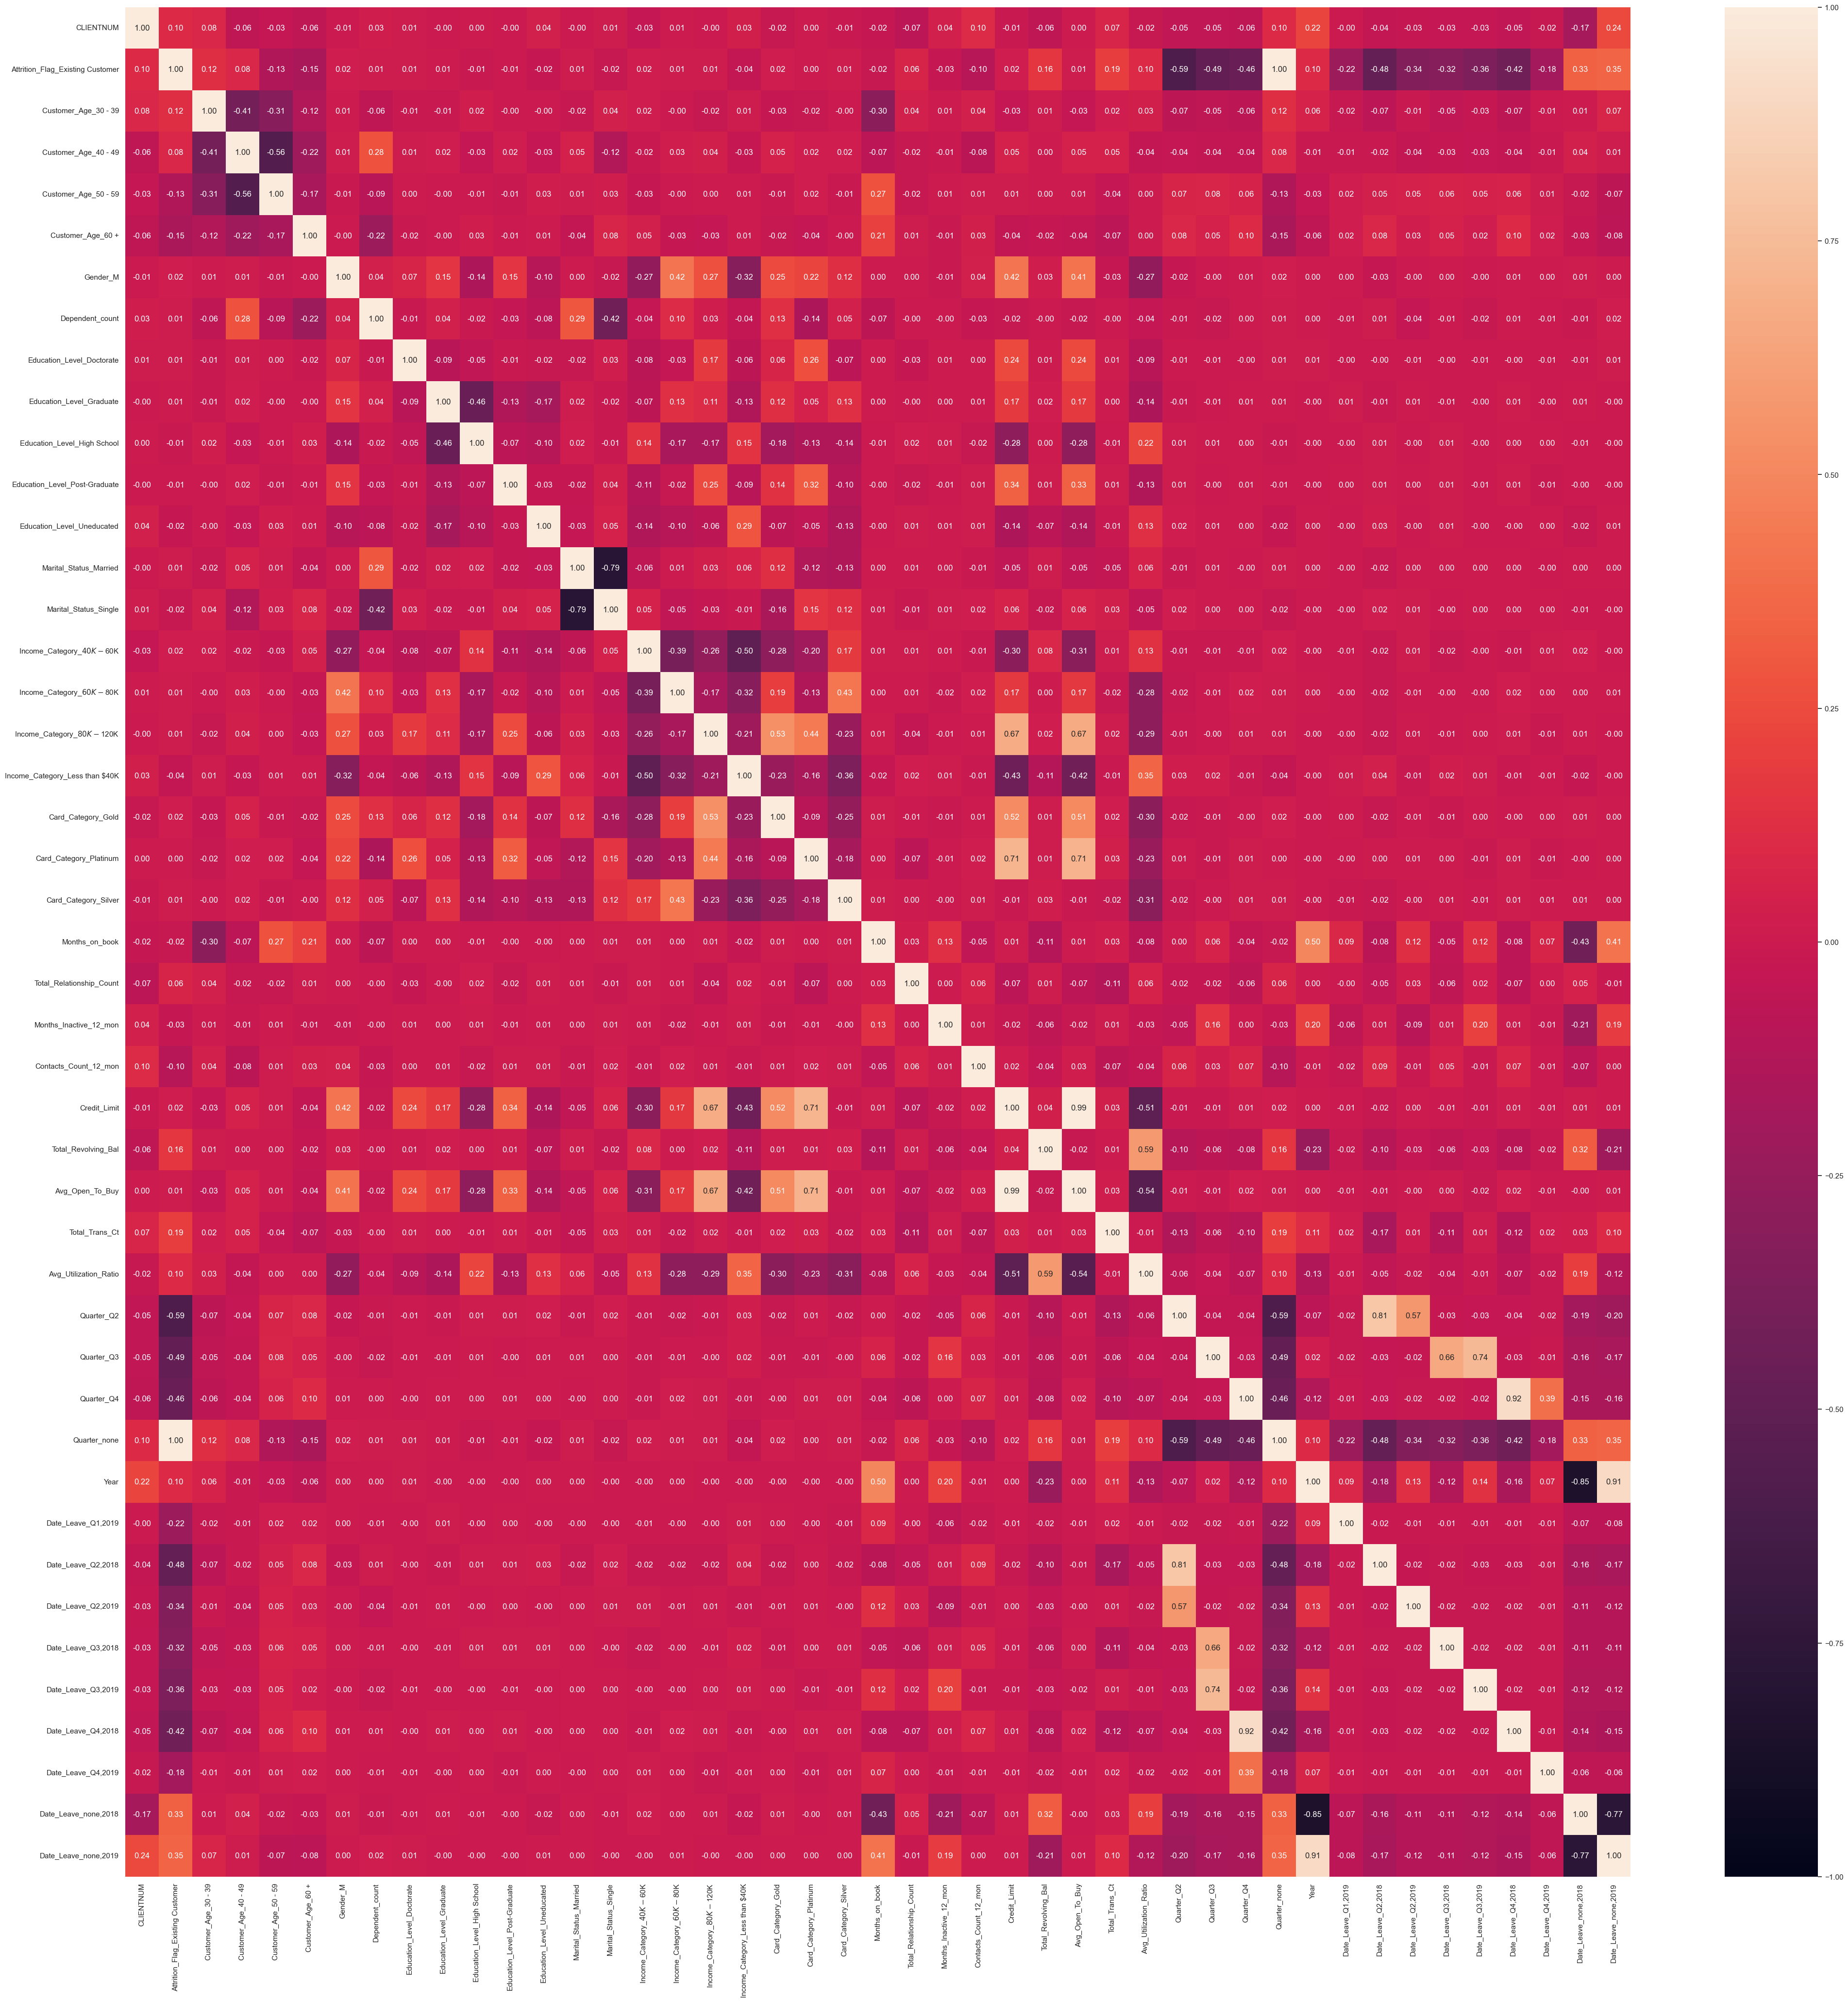

In [8]:
# Create a figure with a specific size
fig = plt.figure(figsize=(50, 50))

# Generate a heatmap of the correlation matrix
sns.heatmap(clientInfo_num.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")

# Display the heatmap
plt.show()

In [9]:
clientInfo_num.head()

CLIENTNUM  Attrition_Flag_Existing Customer  Customer_Age_30 - 39  \
0  712672083                               1.0                   0.0   
1  713049933                               1.0                   0.0   
2  713049933                               1.0                   0.0   
3  713135883                               1.0                   0.0   
4  713135883                               1.0                   0.0   

   Customer_Age_40 - 49  Customer_Age_50 - 59  Customer_Age_60 +  Gender_M  \
0                   0.0                   0.0                1.0       0.0   
1                   1.0                   0.0                0.0       0.0   
2                   1.0                   0.0                0.0       0.0   
3                   0.0                   0.0                1.0       0.0   
4                   0.0                   0.0                1.0       0.0   

   Dependent_count  Education_Level_Doctorate  Education_Level_Graduate  ...  \
0                0                        0.0                       0.0  ...   
1                1                        0.0                       1.0  ...   
2                1                        0.0                       1.0  ...   
3                0                        0.0                       0.0  ...   
4                0                        0.0                       0.0  ...   

   Year  Date_Leave_Q1,2019  Date_Leave_Q2,2018  Date_Leave_Q2,2019  \
0  2018                 0.0                 0.0                 0.0   
1  2018                 0.0                 0.0                 0.0   
2  2019                 0.0                 0.0                 0.0   
3  2019                 0.0                 0.0                 0.0   
4  2018                 0.0                 0.0                 0.0   

   Date_Leave_Q3,2018  Date_Leave_Q3,2019  Date_Leave_Q4,2018  \
0                 0.0                 0.0                 0.0   
1                 0.0                 0.0                 0.0   
2                 0.0                 0.0                 0.0   
3                 0.0                 0.0                 0.0   
4                 0.0                 0.0                 0.0   

   Date_Leave_Q4,2019  Date_Leave_none,2018  Date_Leave_none,2019  
0                 0.0                   1.0                   0.0  
1                 0.0                   1.0                   0.0  
2                 0.0                   0.0                   1.0  
3                 0.0                   0.0                   1.0  
4                 0.0                   1.0                   0.0  

[5 rows x 45 columns]

In [10]:
# Check the data type of each variable
print(clientInfo_num.dtypes)

CLIENTNUM                             int64
Attrition_Flag_Existing Customer    float64
Customer_Age_30 - 39                float64
Customer_Age_40 - 49                float64
Customer_Age_50 - 59                float64
Customer_Age_60 +                   float64
Gender_M                            float64
Dependent_count                       int64
Education_Level_Doctorate           float64
Education_Level_Graduate            float64
Education_Level_High School         float64
Education_Level_Post-Graduate       float64
Education_Level_Uneducated          float64
Marital_Status_Married              float64
Marital_Status_Single               float64
Income_Category_$40K - $60K         float64
Income_Category_$60K - $80K         float64
Income_Category_$80K - $120K        float64
Income_Category_Less than $40K      float64
Card_Category_Gold                  float64
Card_Category_Platinum              float64
Card_Category_Silver                float64
Months_on_book                  

### Exploratory Analysis


In [11]:
# Define a list of categorical variables to select
categorical_variables = [
    "Customer_Age", "Gender", "Education_Level", "Marital_Status",
    "Income_Category", "Card_Category", "Quarter", "Date_Leave"
]

# Create a new DataFrame containing only the selected categorical variables from clientInfo
clientInfo_categorical = pd.DataFrame(clientInfo[categorical_variables])


In [12]:
# Initialize a LabelEncoder for the categorical variables
label_encoder = LabelEncoder()

# Create a copy of the DataFrame to store the encoded values
clientInfo_encoded = clientInfo_categorical.copy()

# Iterate through the columns and apply label encoding for object (categorical) columns
for column in clientInfo_categorical.columns:
      # Use the LabelEncoder to encode the column
      clientInfo_encoded[column] = label_encoder.fit_transform(clientInfo_categorical[column])

In [13]:
# Define a list of numeric variables to select
numeric_variables = [
    "Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Avg_Utilization_Ratio",
    "Dependent_count", "Months_on_book", "Total_Relationship_Count", "Months_Inactive_12_mon",
    "Contacts_Count_12_mon", "Total_Trans_Ct"
]

# Create a new DataFrame containing only the selected numeric variables from clientInfo
clientInfo_numeric = pd.DataFrame(clientInfo[numeric_variables])


In [14]:
# Combine the numeric and encoded categorical DataFrames horizontally
clientInfo_combined = pd.concat([clientInfo_numeric, clientInfo_encoded], axis=1)

# Drop rows with missing values (NaN)
clientInfo_combined = clientInfo_combined.dropna()

<Axes: >

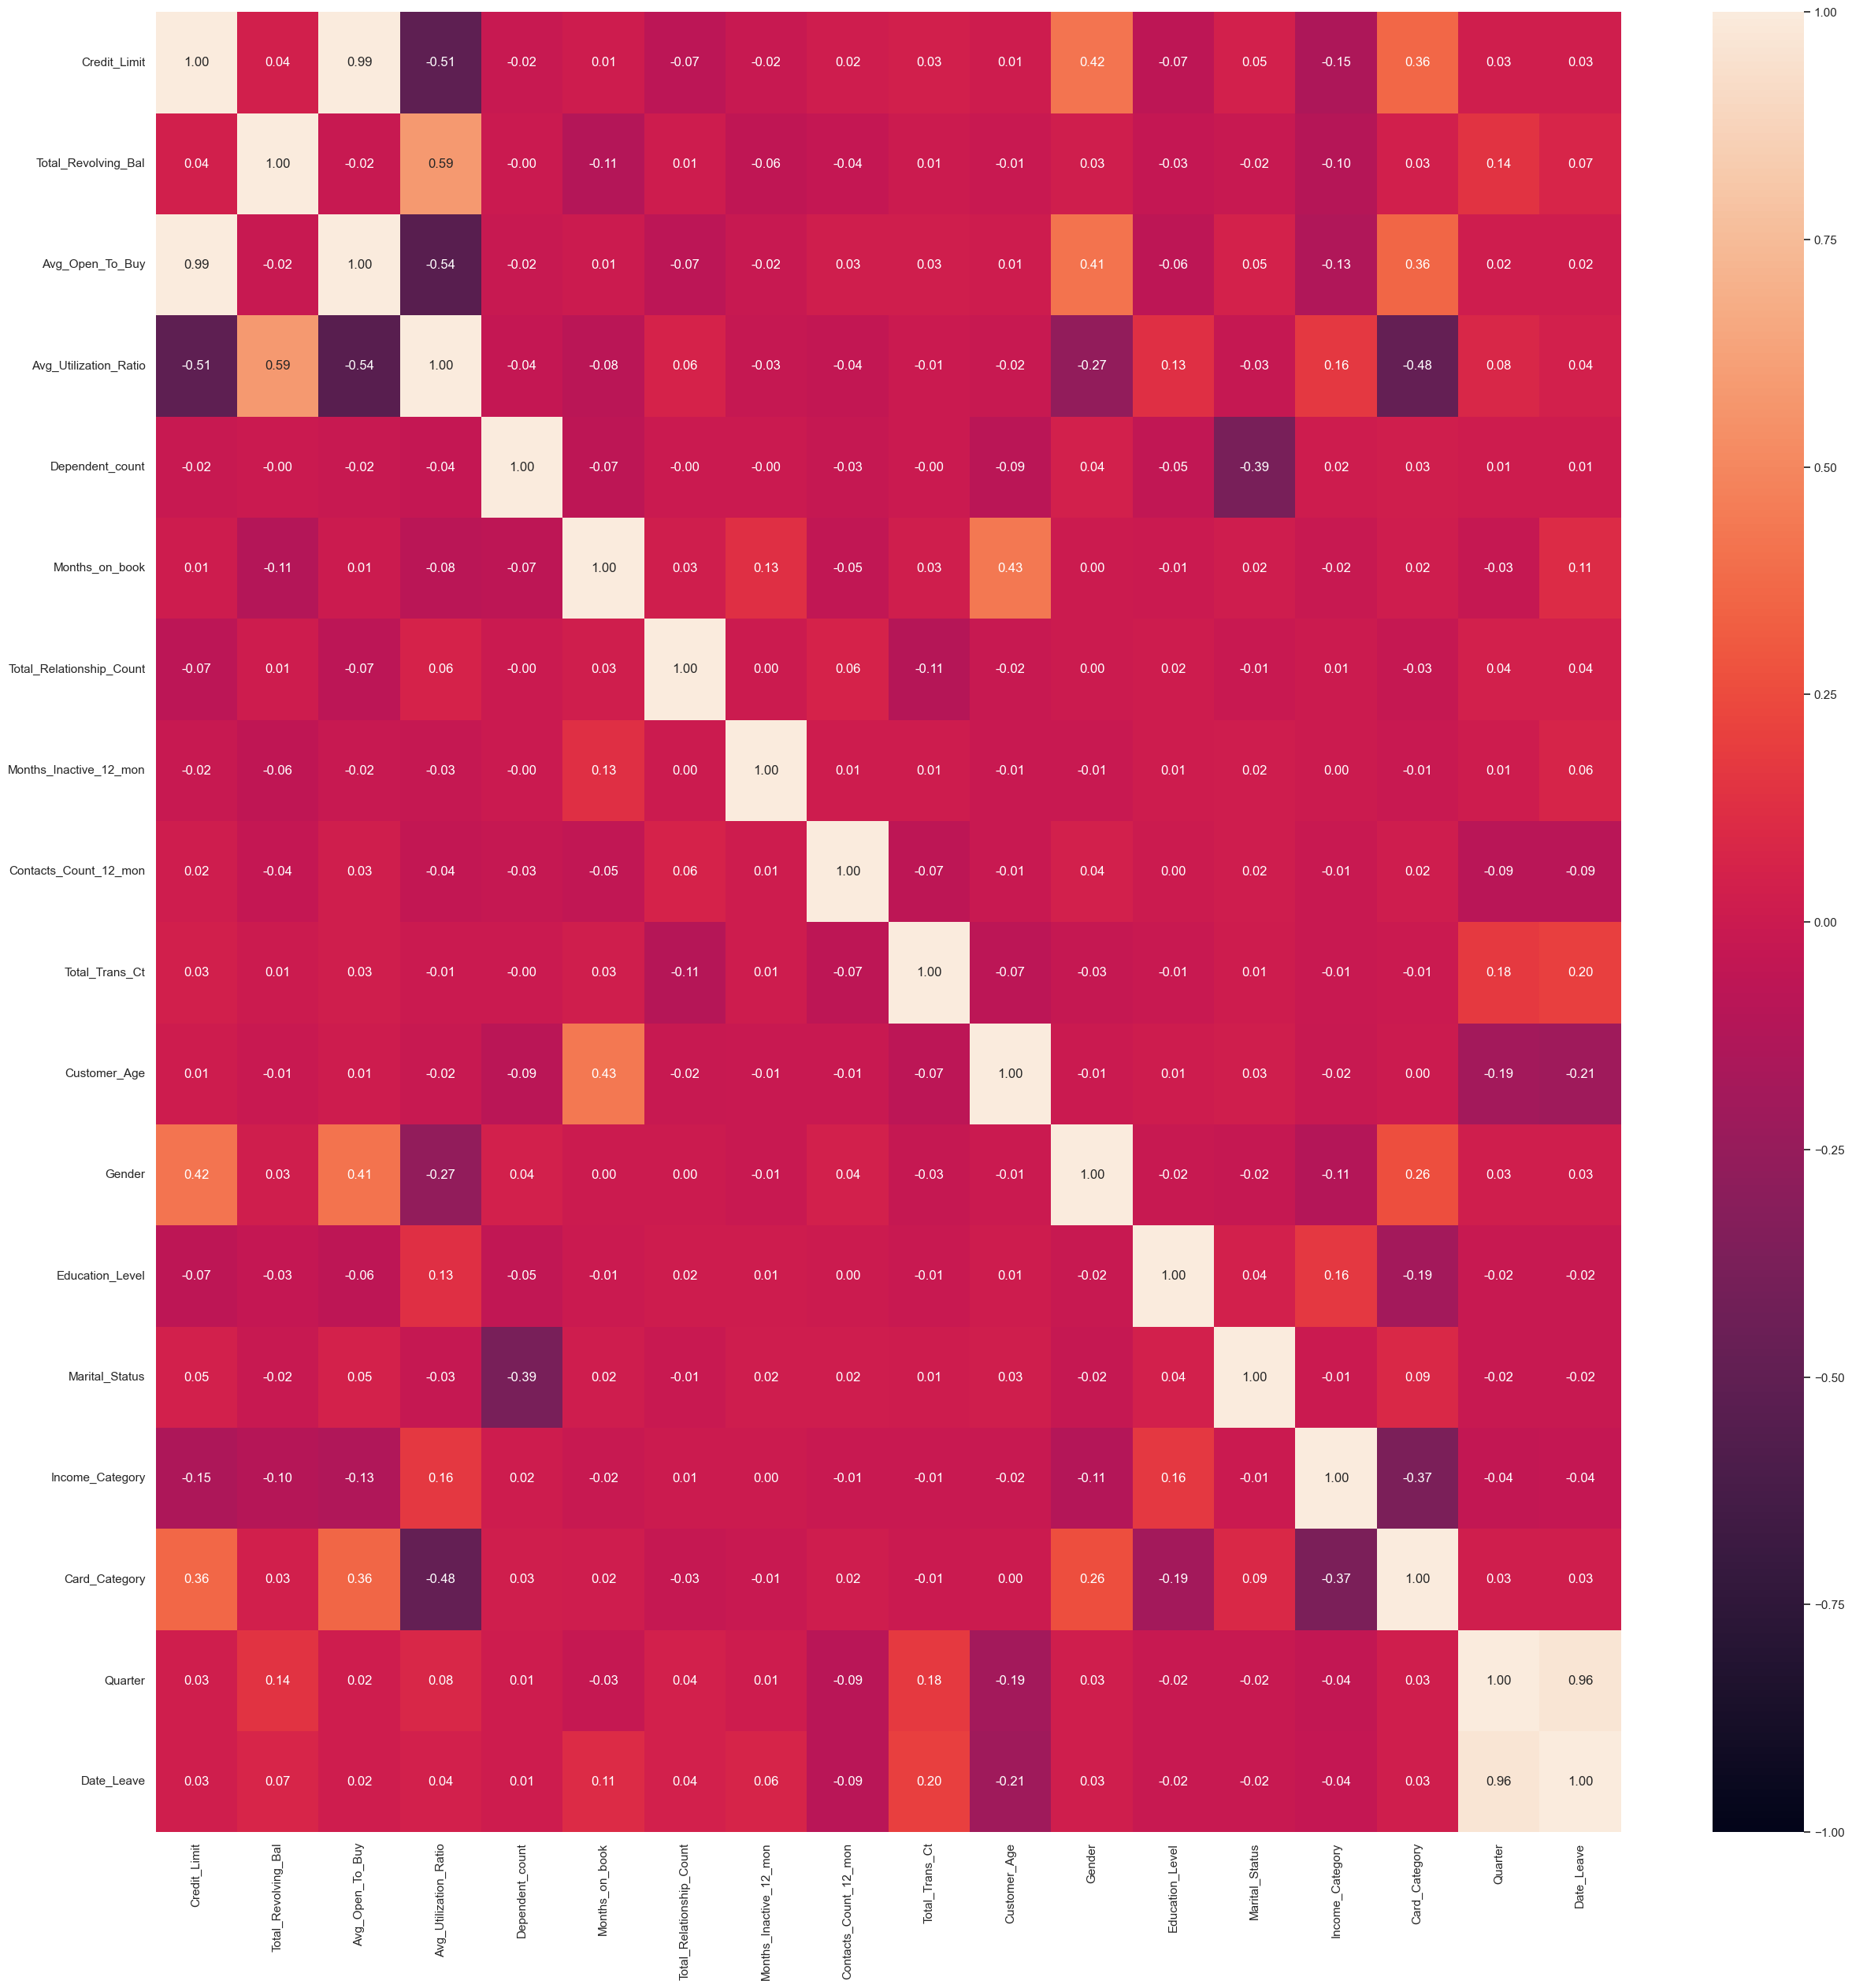

In [15]:
# Create a figure with a specified size
f = plt.figure(figsize=(30, 30))

# Generate a correlation heatmap for the combined DataFrame
sns.heatmap(clientInfo_combined.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f")

####The explained variance for both train and test sets is both near 0.78 which shows that the model can predict the utilization ratio of the card users relatively well.


# Predict card category (colours)



Card Categories : 4
Blue        9994
Silver      6549
Gold        2318
Platinum    1210
Name: Card_Category, dtype: int64


Text(0.5, 1.02, 'Distribution of Card Categories in the Dataset')

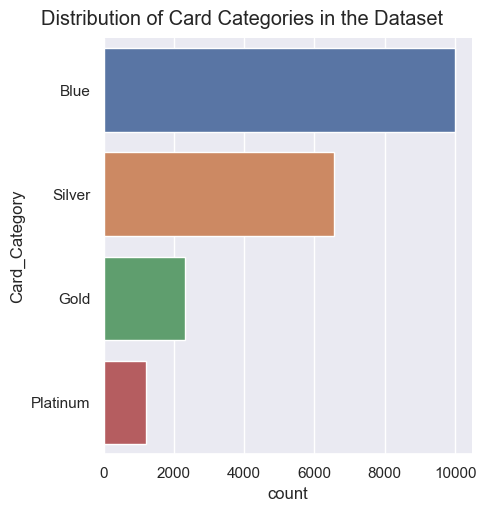

In [16]:
# Card Category in the Dataset
print("Card Categories :", len(clientInfo["Card_Category"].unique()))

# Number of clients of each Card Category
print(clientInfo["Card_Category"].value_counts())

# Create a count plot
ax = sns.catplot(y="Card_Category", data=clientInfo, kind="count")
ax.fig.suptitle("Distribution of Card Categories in the Dataset", y=1.02)


Text(0.5, 1.0, 'Relationship between Gender and Avg_Utilization_Ratio')

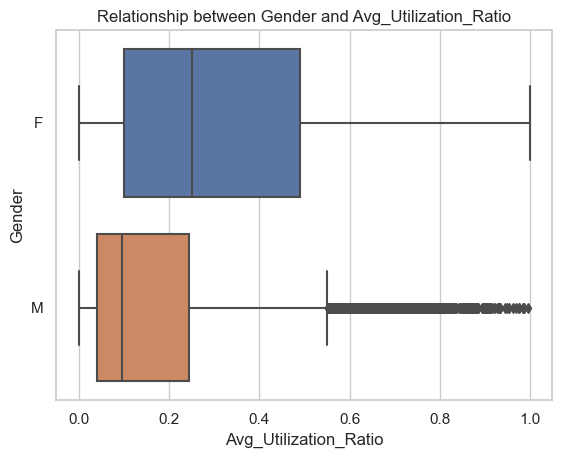

In [17]:
# Check the relationship between Gender and Avg_Utilization_Ratio
sns.set(style="whitegrid")
ax = sns.boxplot(x='Avg_Utilization_Ratio', y='Gender', data=clientInfo, orient='h')
ax.set_title("Relationship between Gender and Avg_Utilization_Ratio")

Text(0.5, 1.0, 'Relationship between Customer_Age and Avg_Open_To_Buy')

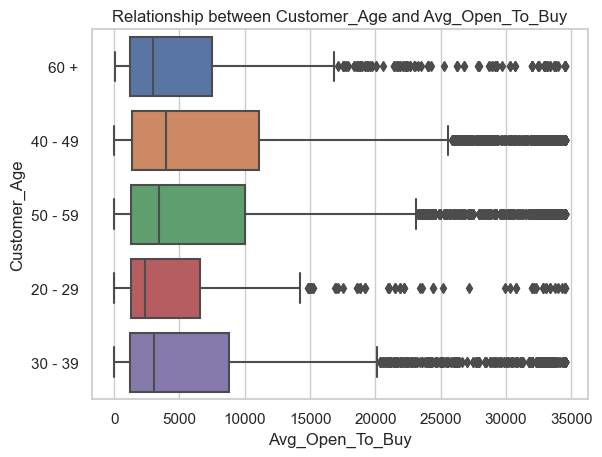

In [18]:
# Check the relationship between Customer_Age and Avg_Open_To_Buy
sns.set(style="whitegrid")
ax = sns.boxplot(x='Avg_Open_To_Buy', y='Customer_Age', data=clientInfo, orient='h')
ax.set_title("Relationship between Customer_Age and Avg_Open_To_Buy")

Text(0.5, 1.0, 'Relationship between Customer_Age and Credit_Limit')

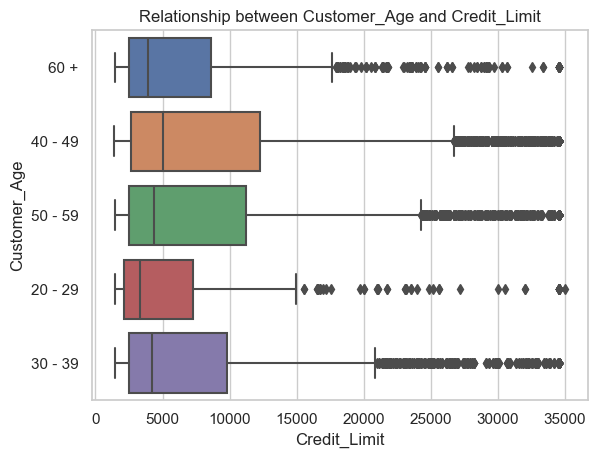

In [19]:
# Check the relationship between Customer_Age and Credit_Limit
sns.set(style="whitegrid")
ax = sns.boxplot(x='Credit_Limit', y='Customer_Age', data=clientInfo, orient='h')
ax.set_title("Relationship between Customer_Age and Credit_Limit")

# Comparing categorical variables with card_category

In [20]:
# Function to convert creditlimit from Numeric to Categorical
def cred_limit(limit):
    if limit < 10000:
      return '0-9999'
    elif limit >= 10000 and limit < 20000:
      return '10000-19999'
    elif limit >= 20000 and limit < 30000:
      return '20000 - 29999'
    elif limit >= 30000:
      return '30000 - 39999'
    else:
      return
clientInfo["Credit_Limit"] = clientInfo["Credit_Limit"].apply(cred_limit)

def avg_otb(otb):
    if otb < 10000:
      return '0-9999'
    elif otb >= 10000 and otb < 20000:
      return '10000-19999'
    elif otb >= 20000 and otb < 30000:
      return '20000 - 29999'
    elif otb >= 30000:
      return '30000 - 39999'
    else:
      return
clientInfo["Avg_Open_To_Buy"] = clientInfo["Avg_Open_To_Buy"].apply(avg_otb)

In [21]:
# Define the list of all variables
all_variables = [
    'Customer_Age', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
    'Credit_Limit', 'Avg_Open_To_Buy', 'Card_Category'
]

# Select a subset of variables
selected_variables = [
    'Credit_Limit', 'Avg_Open_To_Buy'
]


In [22]:
# Function for heatmap cat vs cat
def cat_hm(var1, var2 = 'Card_Category'):
  cont_table = pd.crosstab(clientInfo[var1], clientInfo[var2], normalize = 'index')
  sns.heatmap(cont_table, annot = True, fmt = ".2f")

# Observations

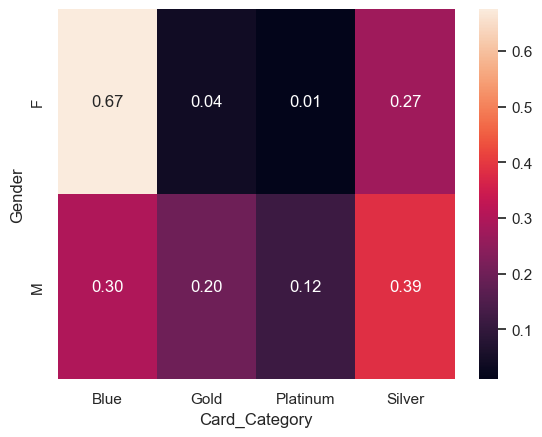

In [23]:
# Significantly more Males possess Platinum and Gold cards
cat_hm(all_variables[1])

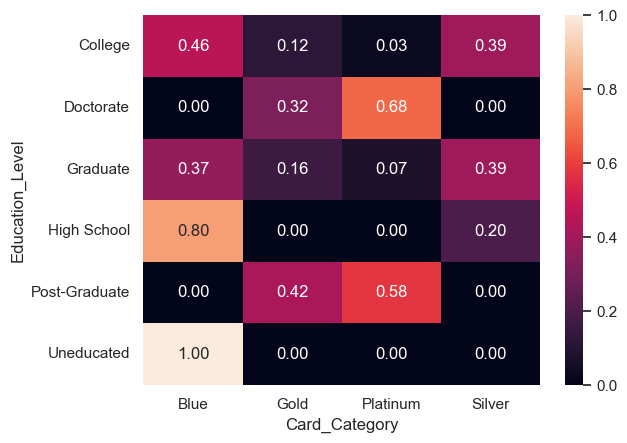

In [24]:
# Finding relationship between education level and card category
cat_hm(all_variables[2])

In [25]:
allcolours = ['Blue', 'Silver', 'Gold', 'Platinum']

In [26]:
# Function for next 5 blocks of codes to compare card categories with various factors
def colour_var(j = all_variables, cardcolour = allcolours):
  for i in cardcolour:
    # No. Card Holders in the Dataset
    colour = clientInfo[clientInfo["Card_Category"] == i]
    print("========================================")
    print("Number of", i, "Card Holders :", len(colour))
    x = clientInfo[j].value_counts()
    y = colour[j].value_counts()
    for a in x:
      percentage = (y / x) * 100
    print("------Percentage (%)------\n", percentage)
    # Plot Card Holders against variable
    print("------Actual Count-------\n", colour[j].value_counts())
    sns.catplot(y = j, data = colour, kind = "count", height = 2, aspect = 5)
    plt.title(i)

Number of Blue Card Holders : 9994
------Percentage (%)------
 F    67.487546
M    29.834606
Name: Gender, dtype: float64
------Actual Count-------
 F    7180
M    2814
Name: Gender, dtype: int64
Number of Silver Card Holders : 6549
------Percentage (%)------
 F    27.305198
M    38.634436
Name: Gender, dtype: float64
------Actual Count-------
 M    3644
F    2905
Name: Gender, dtype: int64
Number of Gold Card Holders : 2318
------Percentage (%)------
 F     4.09813
M    19.95335
Name: Gender, dtype: float64
------Actual Count-------
 M    1882
F     436
Name: Gender, dtype: int64
Number of Platinum Card Holders : 1210
------Percentage (%)------
 F     1.109127
M    11.577608
Name: Gender, dtype: float64
------Actual Count-------
 M    1092
F     118
Name: Gender, dtype: int64


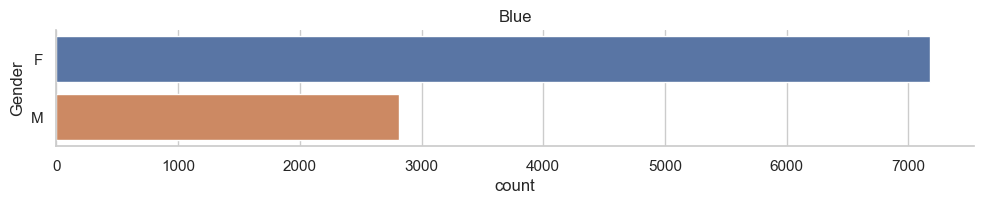

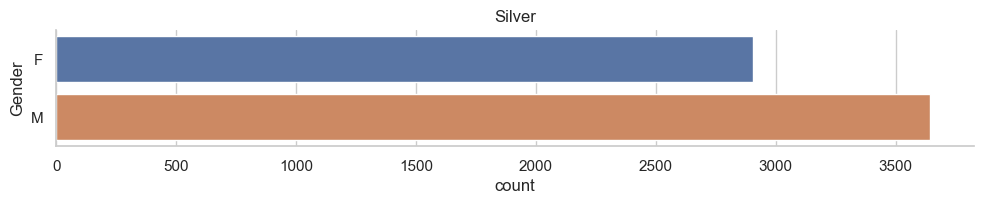

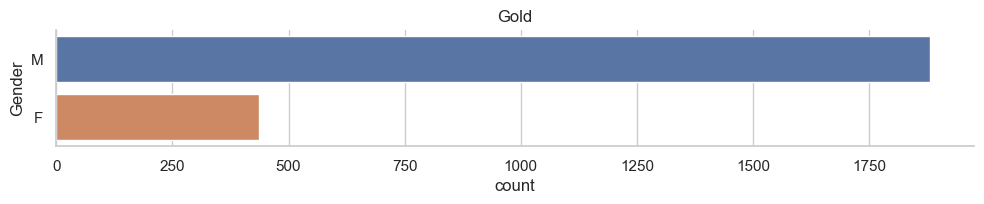

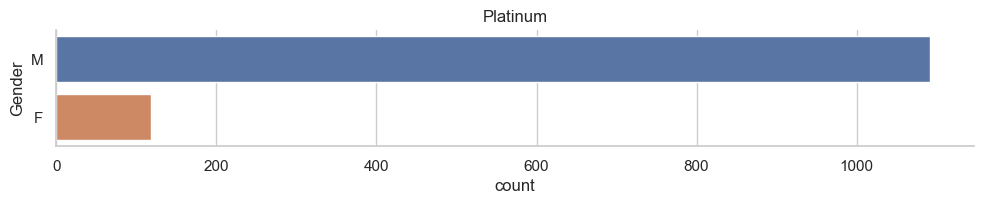

In [27]:
colour_var(j = all_variables[1]) # More male possess higher rank Card_Category

Number of Blue Card Holders : 9994
------Percentage (%)------
 College           45.834823
Doctorate               NaN
Graduate          37.399374
High School       80.152672
Post-Graduate           NaN
Uneducated       100.000000
Name: Education_Level, dtype: float64
------Actual Count-------
 High School    3360
Graduate       3345
College        2564
Uneducated      725
Name: Education_Level, dtype: int64
Number of Silver Card Holders : 6549
------Percentage (%)------
 College          39.381480
Doctorate              NaN
Graduate         39.311270
High School      19.799618
Post-Graduate          NaN
Uneducated             NaN
Name: Education_Level, dtype: float64
------Actual Count-------
 Graduate       3516
College        2203
High School     830
Name: Education_Level, dtype: int64
Number of Gold Card Holders : 2318
------Percentage (%)------
 College          11.798355
Doctorate        32.019704
Graduate         15.843023
High School       0.047710
Post-Graduate    42.130751
Un

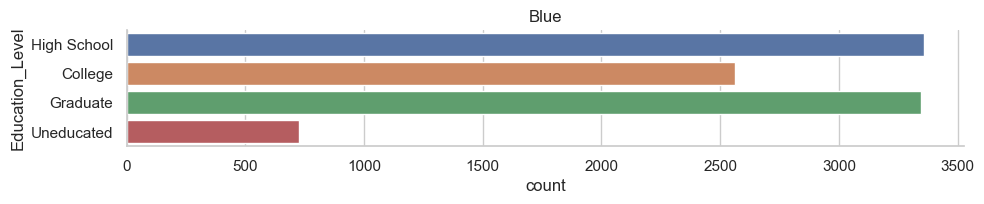

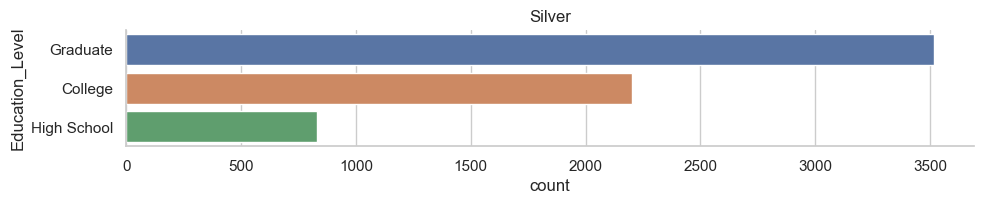

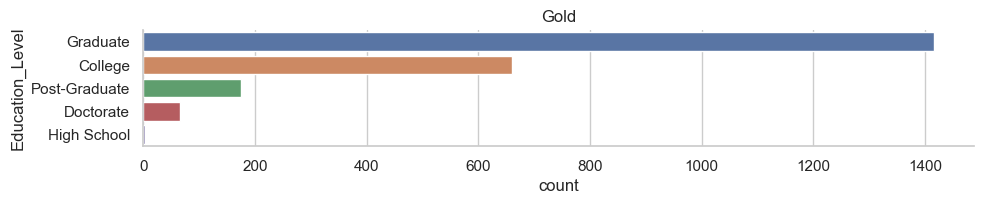

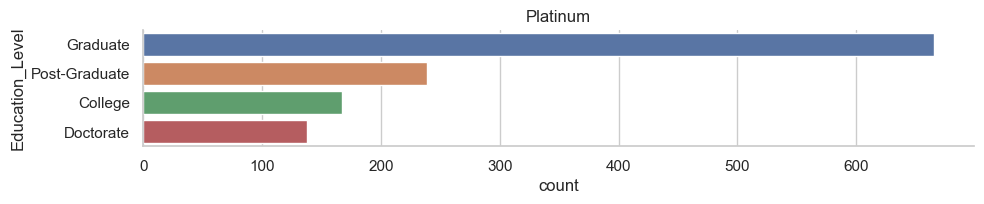

In [28]:
colour_var(j = all_variables[2]) # Education somewhat influence Card_Category

Number of Blue Card Holders : 9994
------Percentage (%)------
 0-9999           68.363089
10000-19999            NaN
20000 - 29999          NaN
30000 - 39999          NaN
Name: Credit_Limit, dtype: float64
------Actual Count-------
 0-9999    9994
Name: Credit_Limit, dtype: int64
Number of Silver Card Holders : 6549
------Percentage (%)------
 0-9999           31.609549
10000-19999      65.489130
20000 - 29999          NaN
30000 - 39999          NaN
Name: Credit_Limit, dtype: float64
------Actual Count-------
 0-9999         4621
10000-19999    1928
Name: Credit_Limit, dtype: int64
Number of Gold Card Holders : 2318
------Percentage (%)------
 0-9999            0.027362
10000-19999      34.307065
20000 - 29999    99.830938
30000 - 39999     9.283019
Name: Credit_Limit, dtype: float64
------Actual Count-------
 20000 - 29999    1181
10000-19999      1010
30000 - 39999     123
0-9999              4
Name: Credit_Limit, dtype: int64
Number of Platinum Card Holders : 1210
------Percentage (

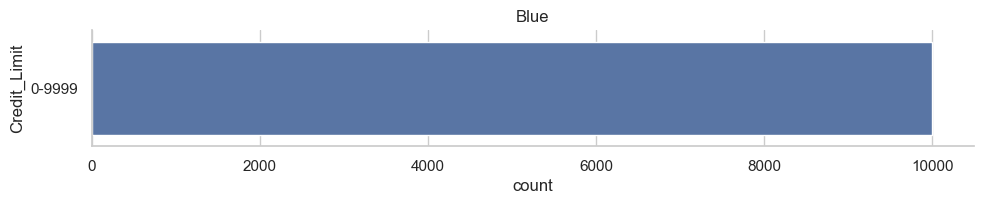

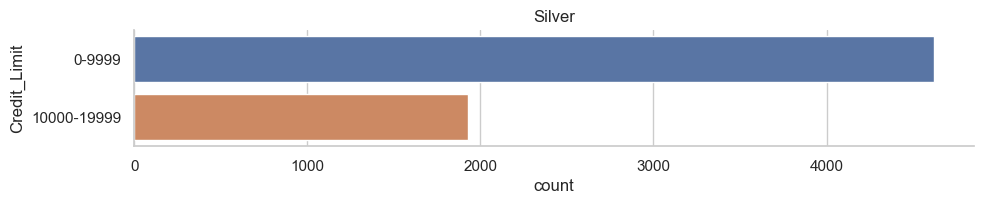

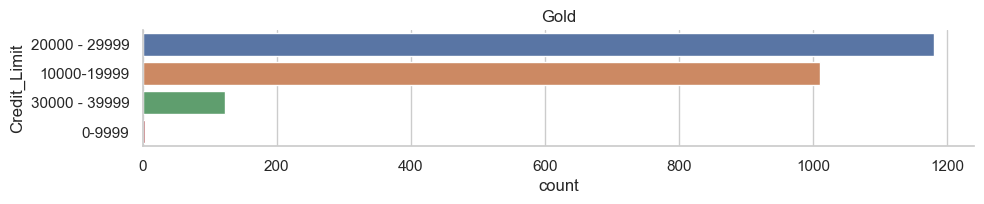

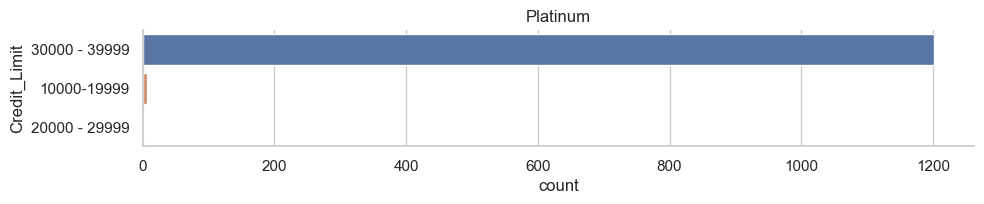

In [29]:
colour_var(j = all_variables[5]) # Credit_Limit strongly influences card_category

Number of Blue Card Holders : 9994
------Percentage (%)------
 0-9999           65.993779
10000-19999       0.530102
30000 - 39999     0.483871
20000 - 29999     0.277521
Name: Avg_Open_To_Buy, dtype: float64
------Actual Count-------
 0-9999           9971
10000-19999        14
30000 - 39999       6
20000 - 29999       3
Name: Avg_Open_To_Buy, dtype: int64
Number of Silver Card Holders : 6549
------Percentage (%)------
 0-9999           33.959891
10000-19999      53.691783
20000 - 29999          NaN
30000 - 39999          NaN
Name: Avg_Open_To_Buy, dtype: float64
------Actual Count-------
 0-9999         5131
10000-19999    1418
Name: Avg_Open_To_Buy, dtype: int64
Number of Gold Card Holders : 2318
------Percentage (%)------
 0-9999            0.039711
10000-19999      45.550928
20000 - 29999    99.167438
30000 - 39999     2.983871
Name: Avg_Open_To_Buy, dtype: float64
------Actual Count-------
 10000-19999      1203
20000 - 29999    1072
30000 - 39999      37
0-9999              6
Na

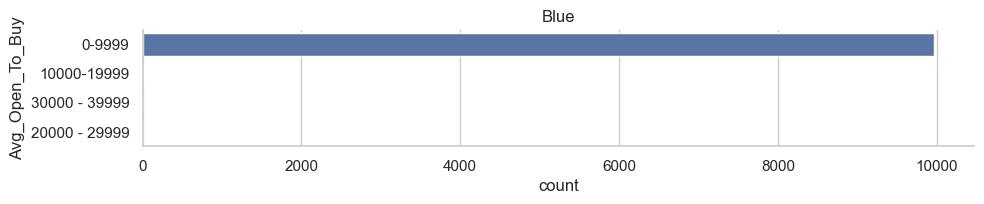

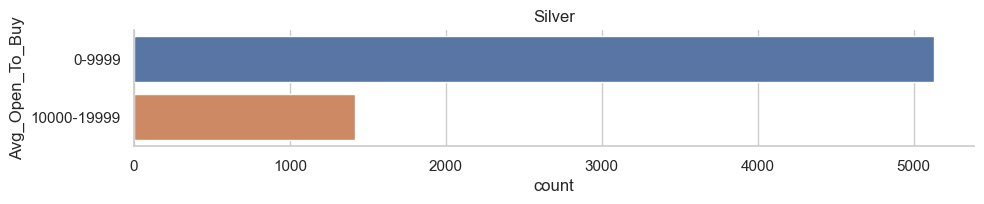

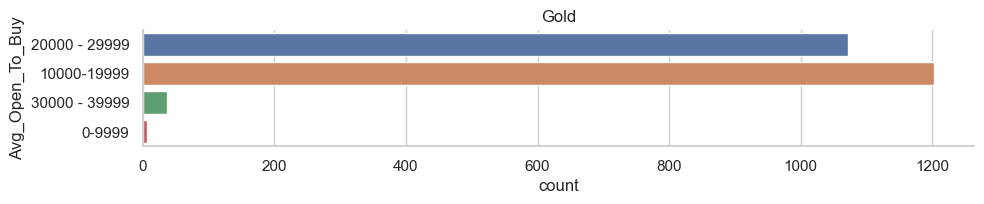

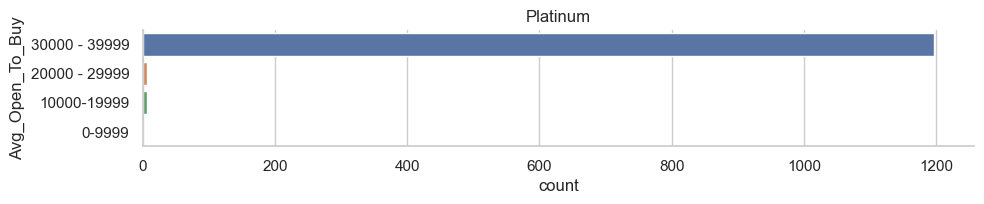

In [30]:
colour_var(j = all_variables[6]) # Avg_OTB strongly influences card_category

In [31]:
# Chi sq function for 2 categorical variables
def chi_sq(var1, var2 = "Card_Category"):
  cont_table = pd.crosstab(clientInfo[var1], clientInfo[var2])
  chi2, p, dof, expected = chi2_contingency(cont_table)
  print(cont_table)
  if p <= 0.05: # If less than 0.05, indicates significant relationship with Card Colour
    print()
    print("Chi-Square Statistic:", chi2)
    print("P-value:", p)
    print("Rejected Null Hypothesis")

In [32]:
# Iterate through the list of variables
for variable in all_variables:
    print("---------------------------------------------")
    # Call the chi_sq function for each variable
    chi_sq(variable)
    print()


---------------------------------------------
Card_Category  Blue  Gold  Platinum  Silver
Customer_Age                               
20 - 29         370    33        22     162
30 - 39        1937   361       192    1203
40 - 49        3936  1138       552    2850
50 - 59        3072   671       413    1936
60 +            679   115        31     398

Chi-Square Statistic: 165.29358379700034
P-value: 4.3717469594120393e-29
Rejected Null Hypothesis

---------------------------------------------
Card_Category  Blue  Gold  Platinum  Silver
Gender                                     
F              7180   436       118    2905
M              2814  1882      1092    3644

Chi-Square Statistic: 3617.2910508264886
P-value: 0.0
Rejected Null Hypothesis

---------------------------------------------
Card_Category    Blue  Gold  Platinum  Silver
Education_Level                              
College          2564   660       167    2203
Doctorate           0    65       138       0
Graduate     

## Decision tree

In [33]:
# Calling the function
clientInfo = pd.read_csv('credit_info_all.csv')
data_conversion()

In [34]:
clientInfo.head()

CLIENTNUM     Attrition_Flag Customer_Age Gender  Dependent_count  \
0  712672083  Existing Customer         60 +      F                0   
1  713049933  Existing Customer      40 - 49      F                1   
2  713049933  Existing Customer      40 - 49      F                1   
3  713135883  Existing Customer         60 +      F                0   
4  713135883  Existing Customer         60 +      F                0   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married  Less than $40K          Blue   
1        Graduate        Married     $40K - $60K        Silver   
2        Graduate        Married     $40K - $60K        Silver   
3         College        Married  Less than $40K          Blue   
4         College        Married  Less than $40K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              36  ...                       3                      2   
1              36  ...                       2                      2   
2              48  ...                       6                      2   
3              65  ...                       5                      0   
4              53  ...                       3                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Trans_Ct  \
0        1438.3                  747            691.3              24   
1        5756.0                    0           5756.0              44   
2        5756.0                  990           5756.0              25   
3        4315.0                  393           3598.0              73   
4        4315.0                  717           3598.0              51   

   Avg_Utilization_Ratio  Quarter  Year  Date_Leave  
0                  0.519     none  2018   none,2018  
1                  0.000     none  2018   none,2018  
2                  0.170     none  2019   none,2019  
3                  0.090     none  2019   none,2019  
4                  0.166     none  2018   none,2018  

[5 rows x 21 columns]

In [35]:
# Create a function for classification
def cat_class(predictor_var, response_var = "Card_Category"):
  y = pd.DataFrame(clientInfo[response_var])
  X = pd.DataFrame(clientInfo[predictor_var])

  for i in X:
    if X[i].dtypes == "object":
      # OneHotEncoder
      encoder = OneHotEncoder(sparse=False, drop='first')
      X_encoded = encoder.fit_transform(X)
      # Split data into test and train
      X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.4)
    else:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
  # Decision Tree using Train Data
  dectree = DecisionTreeClassifier(max_depth = 3)
  dectree.fit(X_train, y_train)

  # Predict Response corresponding to Predictors
  y_train_pred = dectree.predict(X_train)
  y_test_pred = dectree.predict(X_test)

  # Goodness of Fit of Train Data
  print()
  print("*",predictor_var,"*")

  print("Goodness of Fit of Model \tTrain Dataset")
  print("Classification Accuracy \t:", dectree.score(X_train, y_train))
  print()

  # Goodness of Fit of Test Data
  print("Goodness of Fit of Model \tTest Dataset")
  print("Classification Accuracy \t:", dectree.score(X_test, y_test))
  print()

  # Plot the Confusion Matrix for Train and Test
  f, axes = plt.subplots(1, 2, figsize=(12, 4))
  sns.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
  sns.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
  plt.title(predictor_var)

  # Plot Tree
  from sklearn.tree import plot_tree
  f = plt.figure(figsize=(24,12))
  plot_tree(dectree, filled=True, rounded=True, feature_names=X_train.columns.tolist(), class_names=['Blue', 'Silver', 'Gold', 'Platinum'])


* Credit_Limit *
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9975917621657532

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9971353842321584


* Avg_Open_To_Buy *
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9364723467862481

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9376011956657118



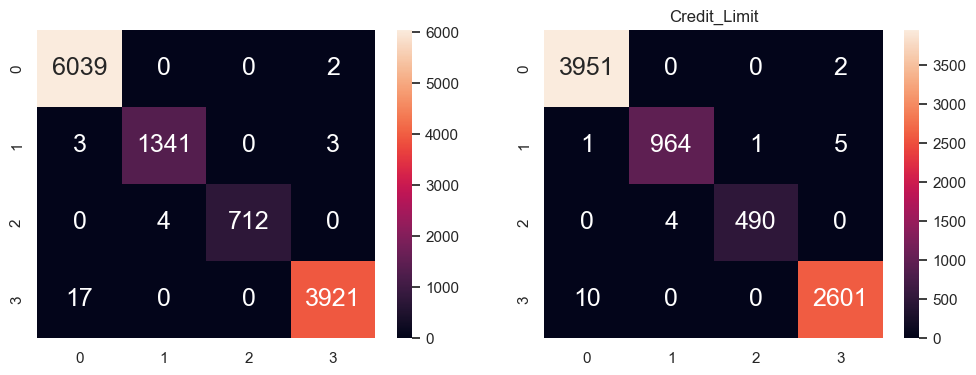

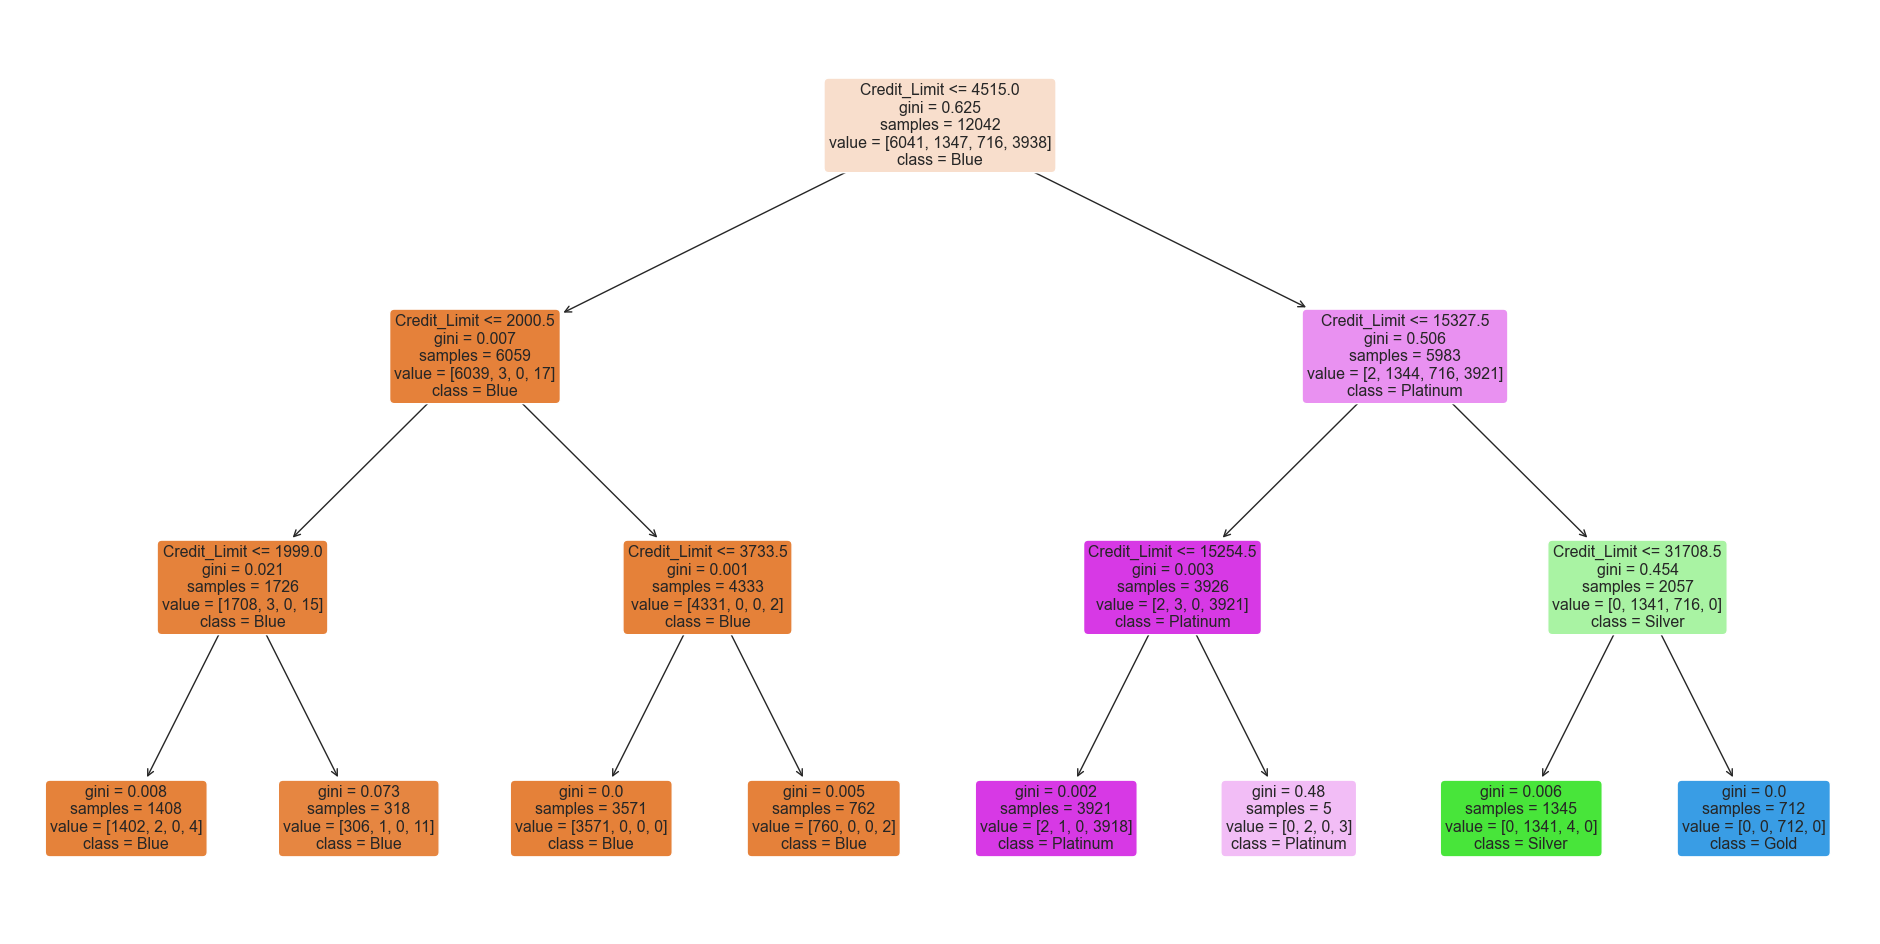

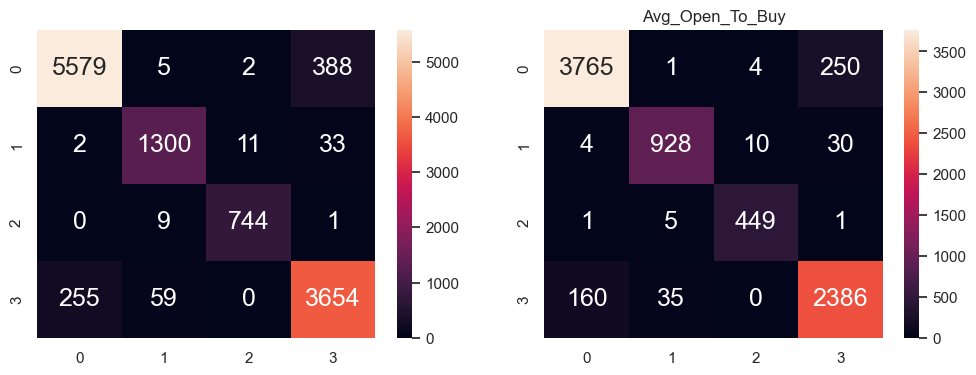

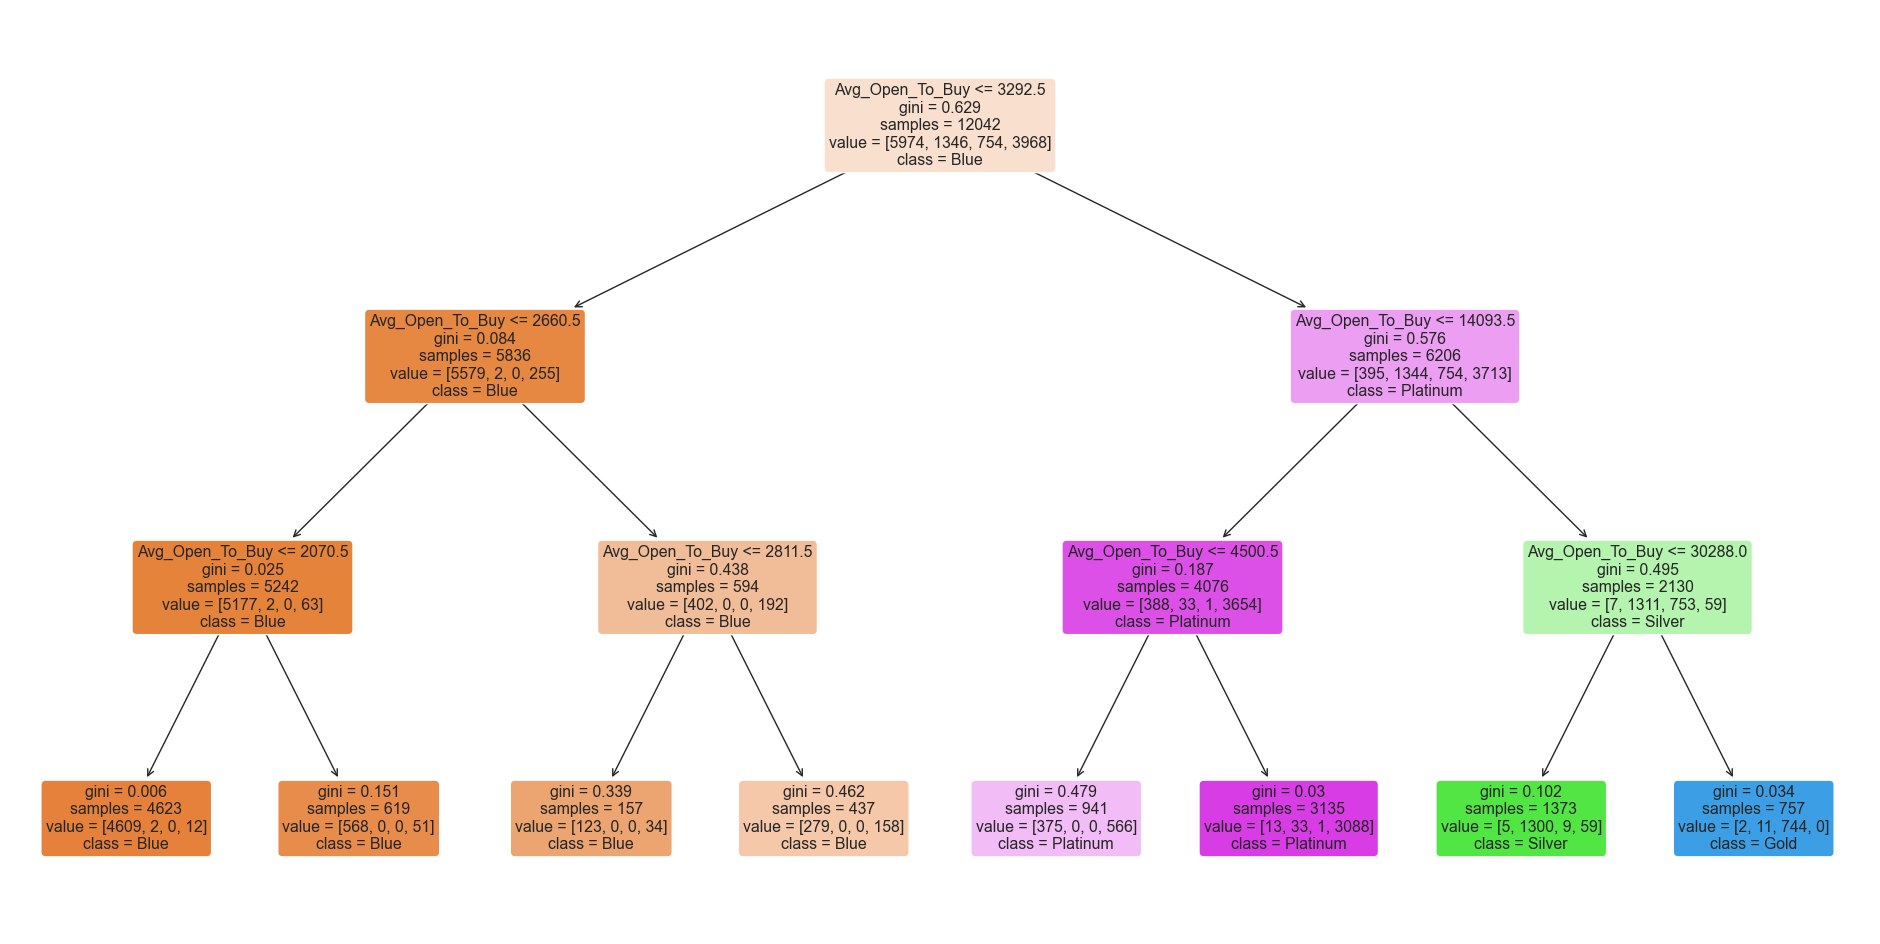

In [36]:
for i in selected_variables:
  cat_class(i)


* ['Credit_Limit', 'Avg_Open_To_Buy'] *
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9980900182693905

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9980072238136755



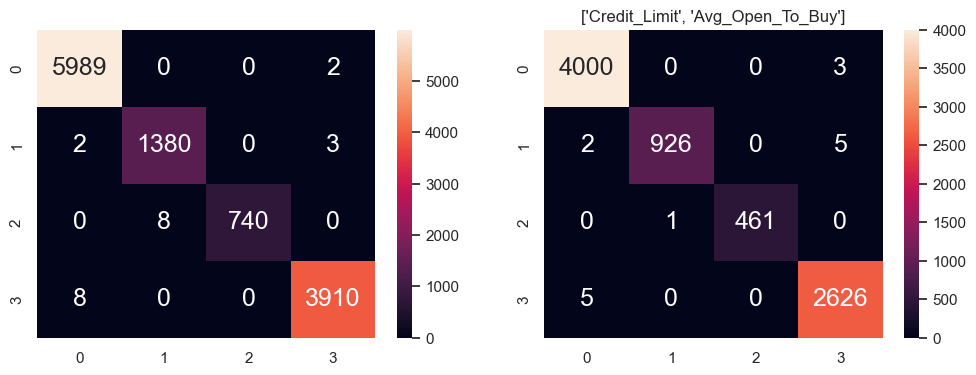

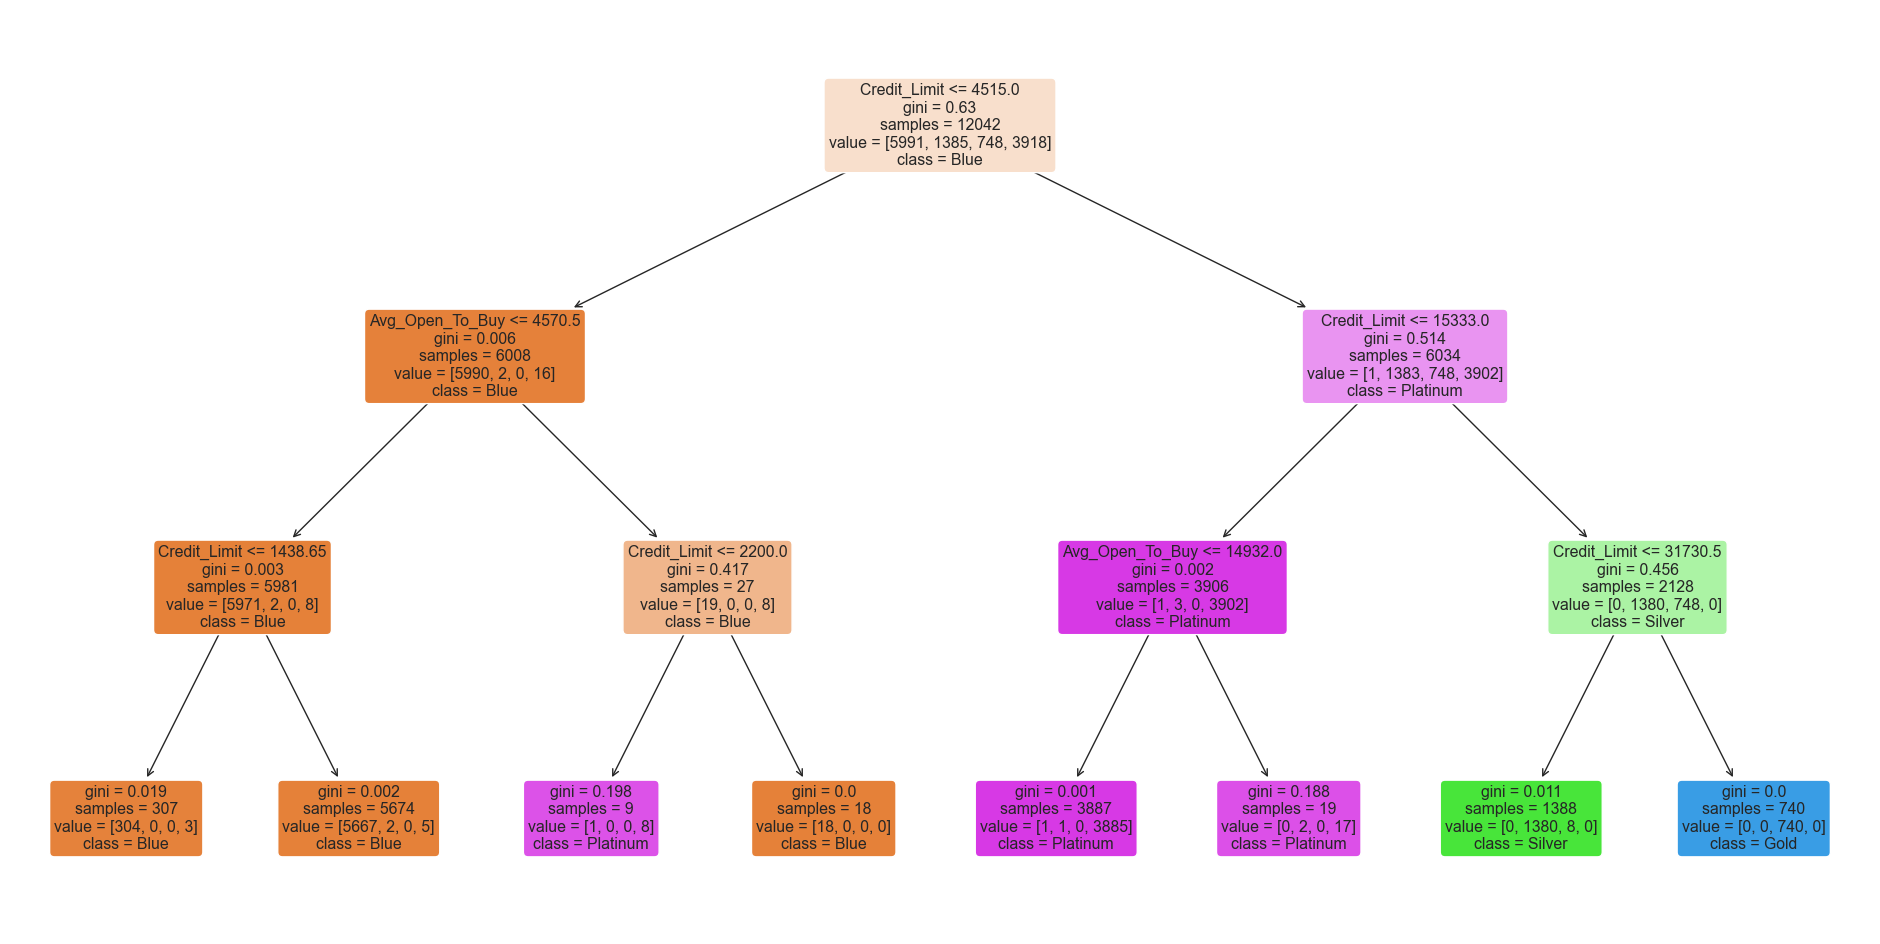

In [37]:
# Multi - variate for Avg OTB and Cred Limit against card category
cat_class(selected_variables)

Converting categorical variables into numeric values for logistic regression

In [38]:
def card_colour(colour):
    if colour == 'Blue':
      return 1
    elif colour == 'Silver':
      return 2
    elif colour == 'Gold':
      return 3
    else:
      return 4
clientInfo["Card_Category"] = clientInfo["Card_Category"].apply(card_colour)

In [39]:
def linreg(var1, var2="Card_Category"):
    X = clientInfo[var1]
    y = clientInfo[var2]

    # Split data into test and train
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Train Regression Model
    linreg = LogisticRegression()
    linreg.fit(X_train, y_train)

    # Run test predictions
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train, color="blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth=1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test, color="green")
    axes[1].plot(y_test, y_test, 'w-', linewidth=1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

    # Add a title to the plot
    plt.suptitle(f"Linear Regression for {var1} and {var2}", fontsize=16)

    plt.show()


C:\Users\User-PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Explained Variance (R^2) 	: 0.9871715033005356
Mean Squared Error (MSE) 	: 0.014698555057299452



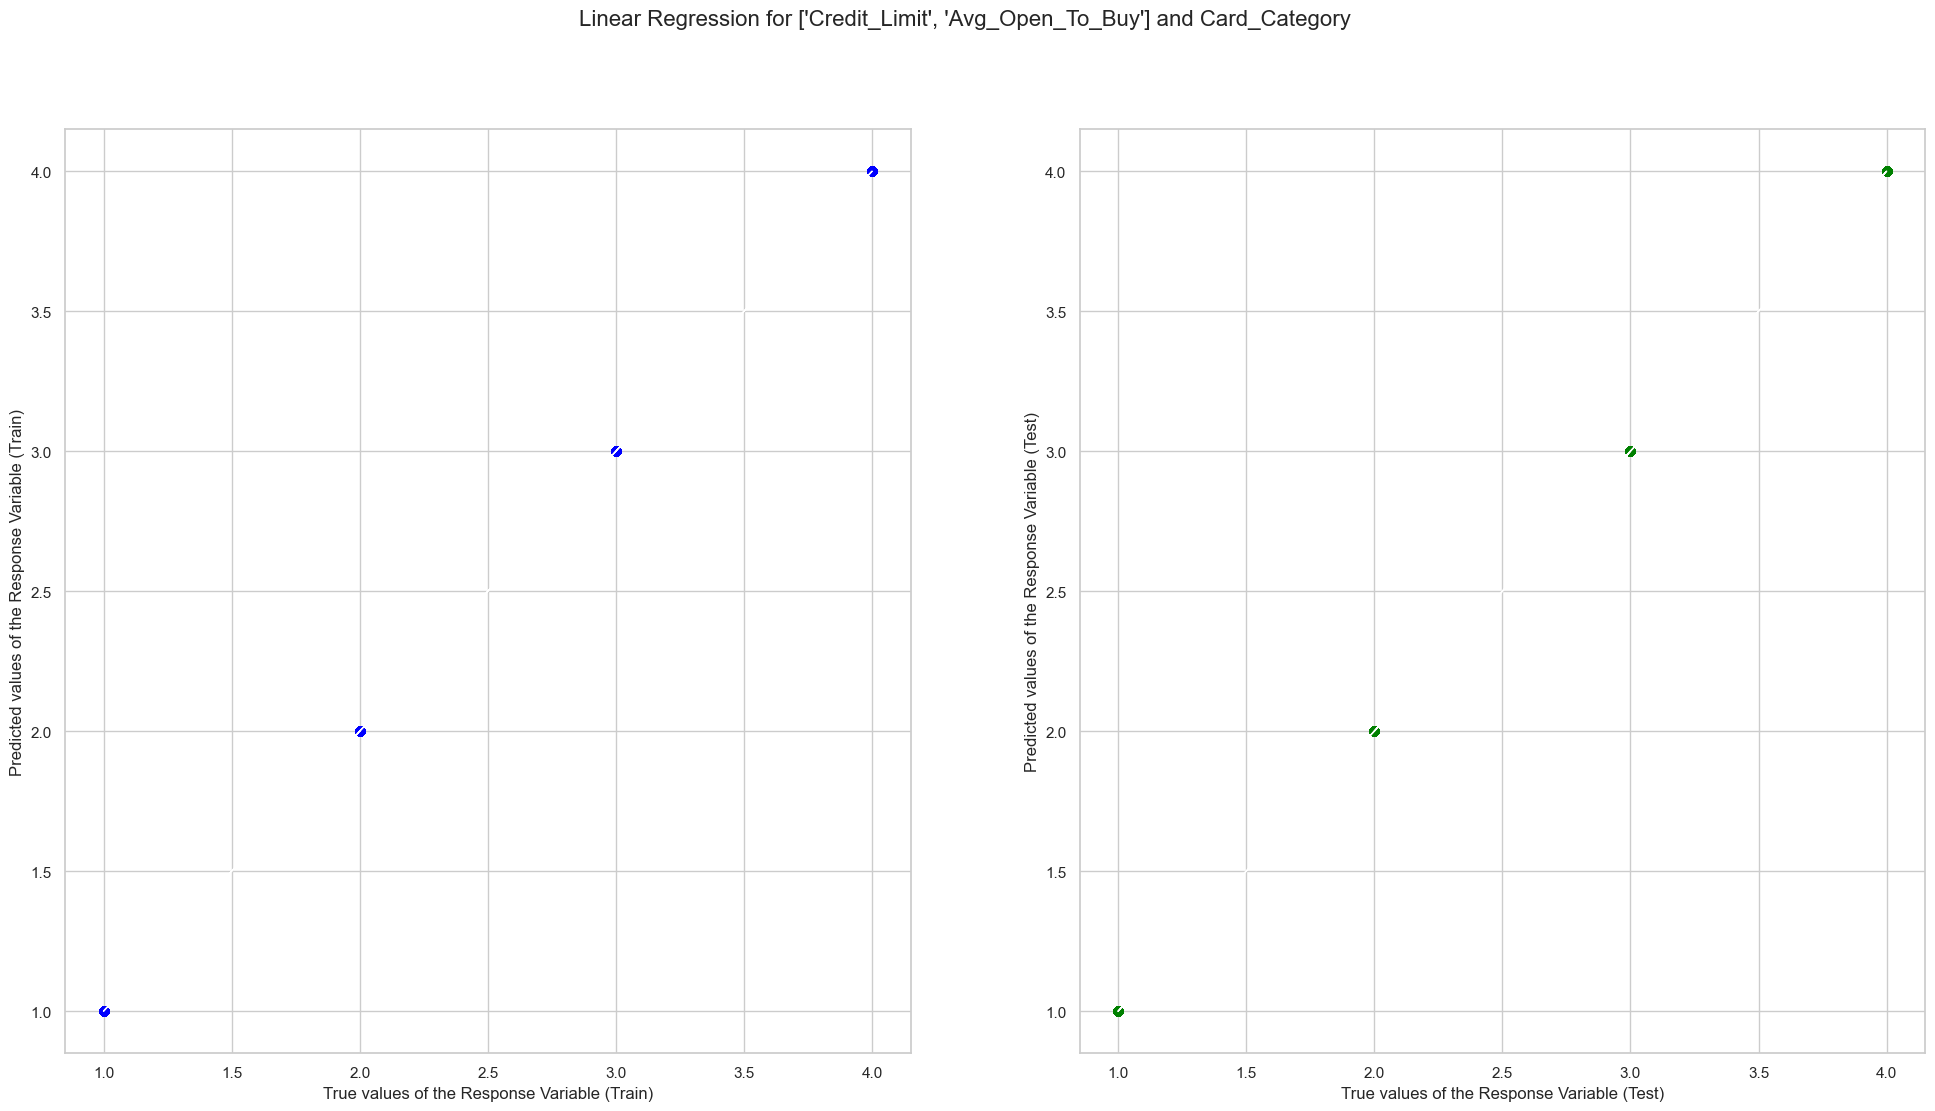

In [40]:
# Perform linear regression for the specified variables
linreg(['Credit_Limit', 'Avg_Open_To_Buy'])

In [41]:
# Exploring new classification method: Naive Bayes
def naive(var1, var2 = "Card_Category"):
  X = clientInfo[[var1]]
  y = clientInfo[var2]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

  gnb = GaussianNB()
  gnb.fit(X_train, y_train)

  pred = gnb.predict(X_test)
  acc = accuracy_score(pred, y_test)
  f1 = f1_score(pred, y_test, average = "weighted")

  prediction = gnb.score(X_test, y_test)
  print("=====================================")
  print(var1)
  print("Actual Value\t:", acc)
  print("Prediction\t:", prediction)
  print("F1 Score\t:", f1)

  labels = y.unique()
  cmd = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test, pred), display_labels=labels)
  cmd.plot()
  plt.title(var1)

Credit_Limit
Actual Value	: 0.9933989288827999
Prediction	: 0.9933989288827999
F1 Score	: 0.9933903931164656
Avg_Open_To_Buy
Actual Value	: 0.9257690870594096
Prediction	: 0.9257690870594096
F1 Score	: 0.9266417334586212


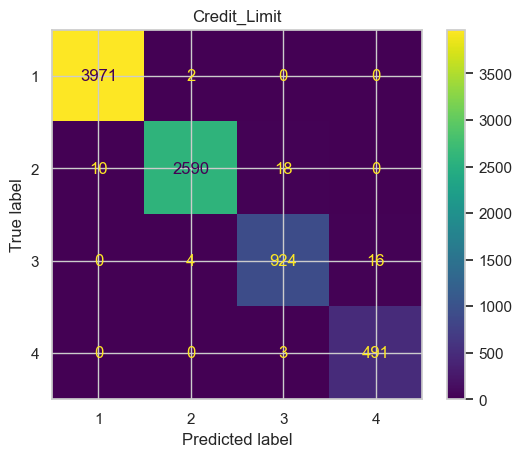

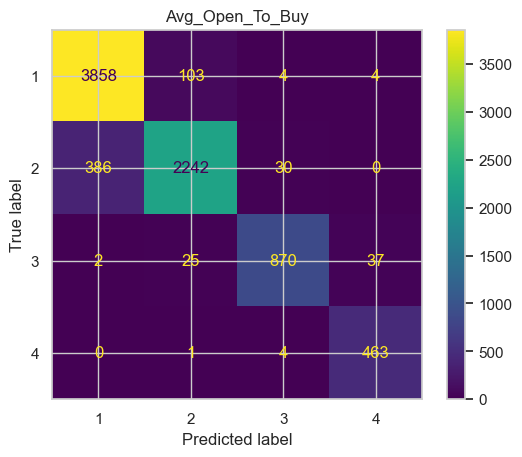

In [42]:
for i in selected_variables:
  naive(i)

# Credit Limit Adjustments based on Avg_Utilization_Ratio, Avg_Open_To_Buy and Total_Revolving_Bal

In [43]:
AUR_Predictors = ["Credit_Limit", "Avg_Open_To_Buy", "Total_Revolving_Bal", "Gender", "Card_Category", "Avg_Utilization_Ratio"]
X_AUR = pd.DataFrame(clientInfo_combined[AUR_Predictors])

In [44]:
# Define pairs of variables for scatterplots
scatterplotPairs = [
    ("Credit_Limit", "Avg_Utilization_Ratio"),
    ("Credit_Limit", "Avg_Open_To_Buy"),
    ("Total_Revolving_Bal", "Avg_Utilization_Ratio"),
    ("Avg_Open_To_Buy", "Avg_Utilization_Ratio"),
    ("Credit_Limit", "Gender"),
    ("Credit_Limit", "Card_Category"),
    ("Avg_Open_To_Buy", "Gender"),
    ("Avg_Open_To_Buy", "Card_Category"),
    ("Avg_Utilization_Ratio", "Card_Category"),
    ("Avg_Utilization_Ratio", "Gender")
]

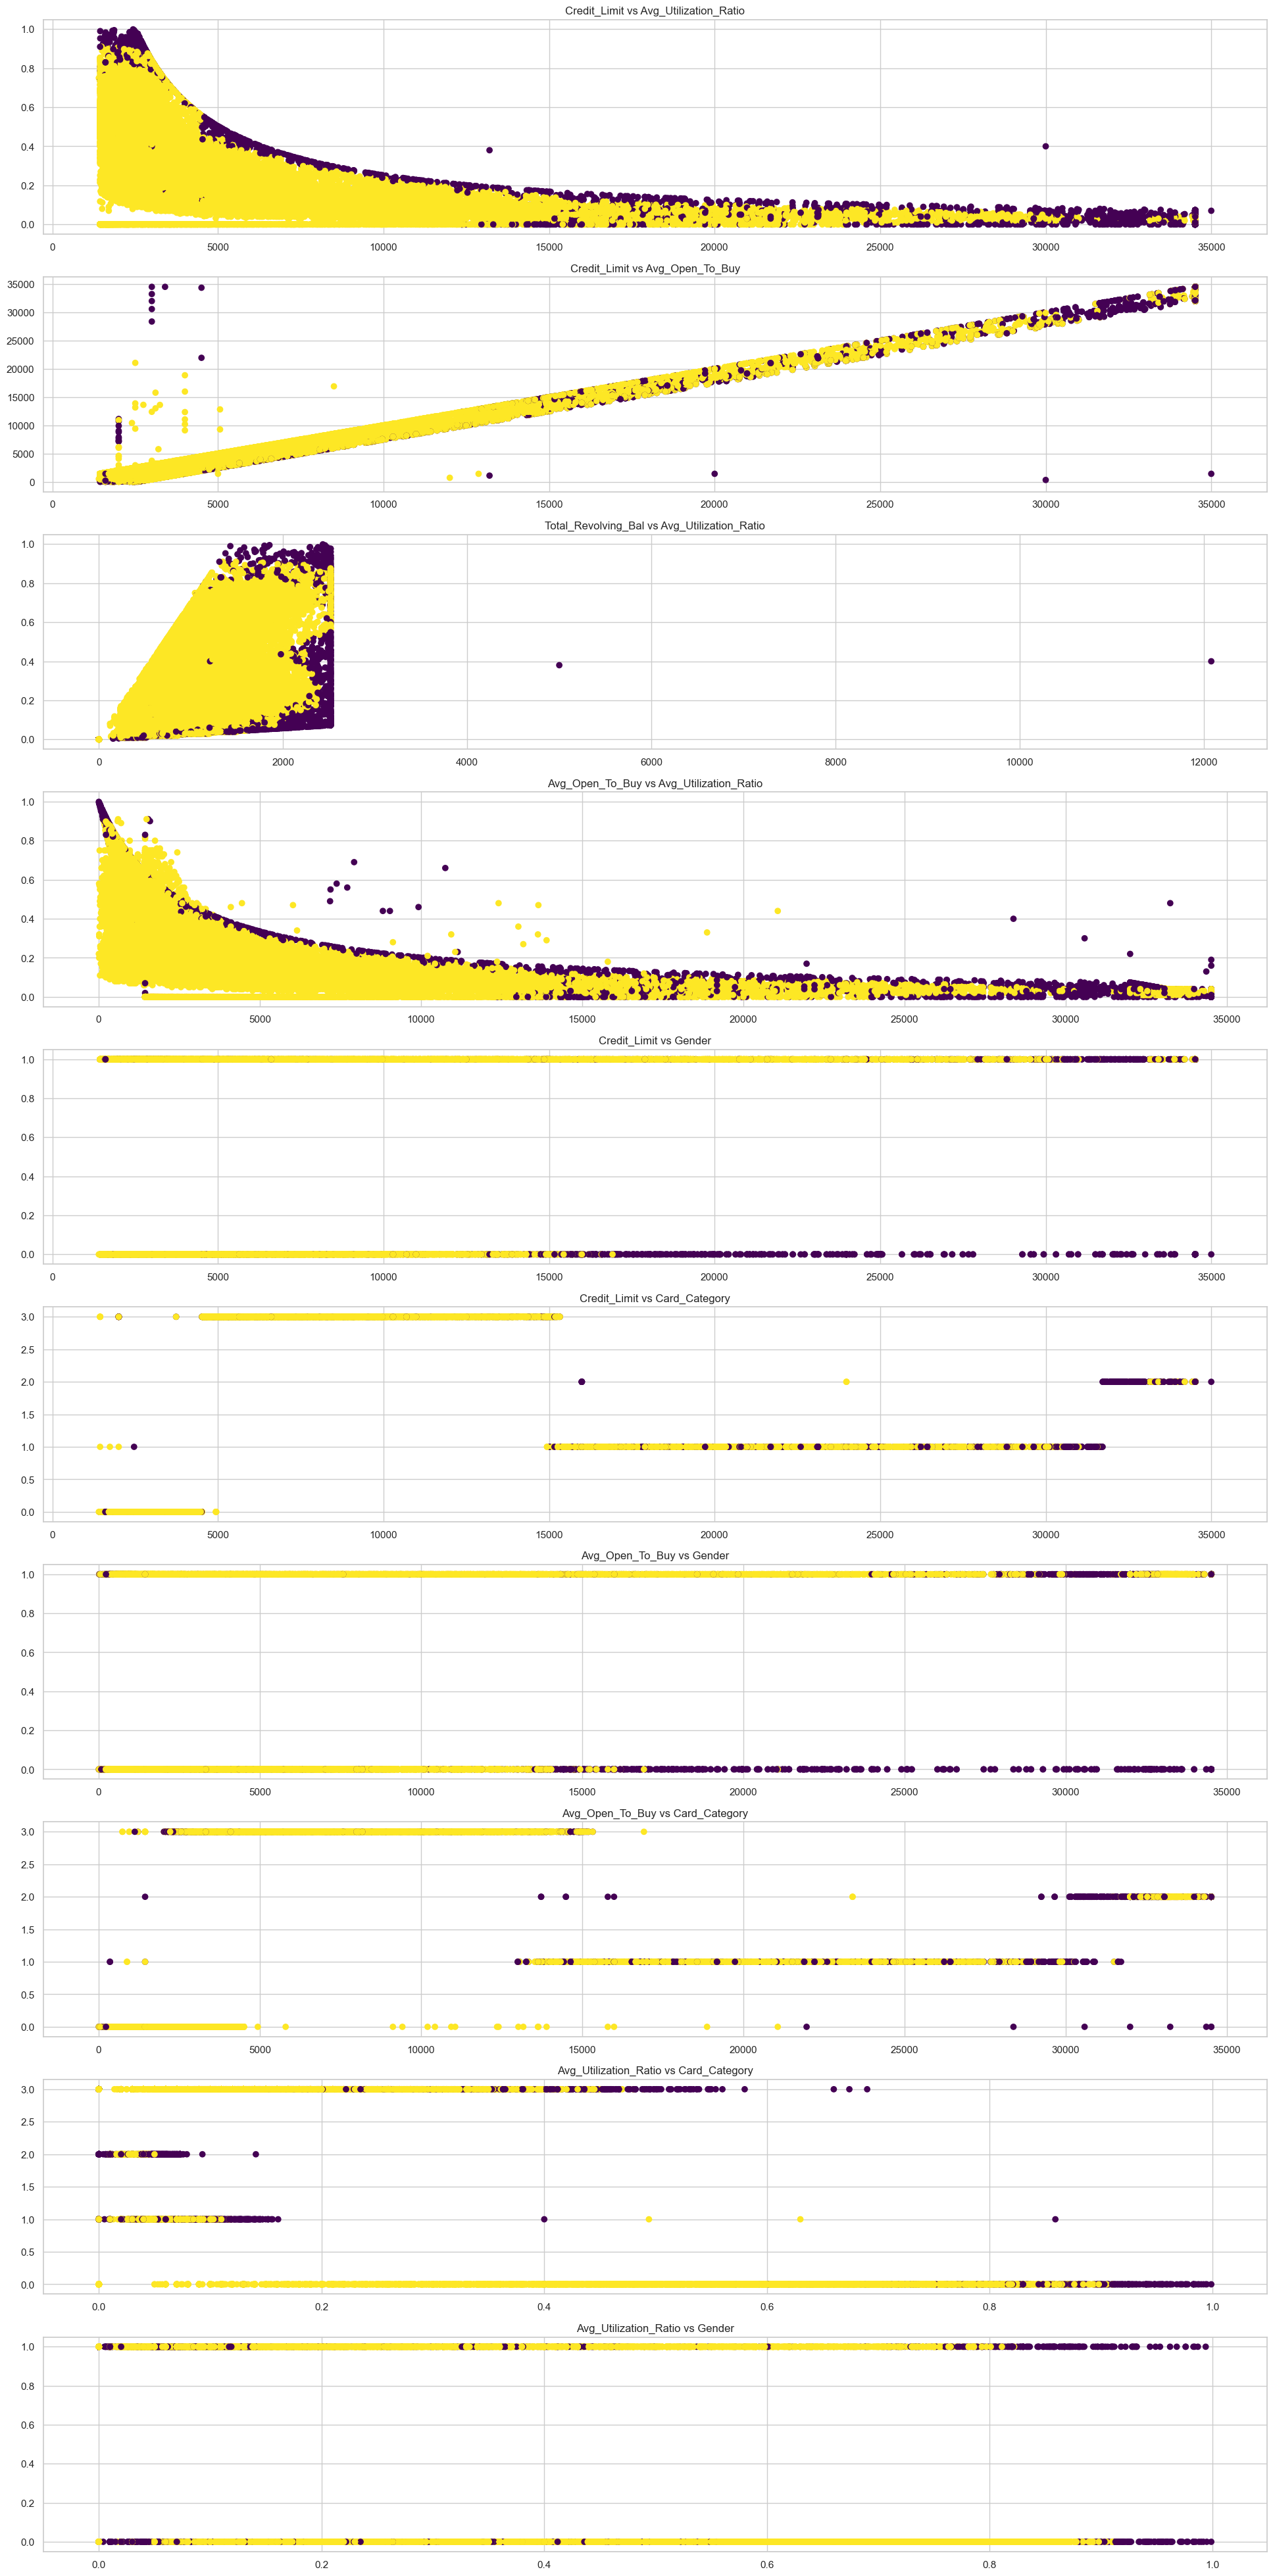

In [45]:
# Set the desired anomaly proportion
anomaly_proportion_AUR = 0.10

# Create an Isolation Forest
IF_AUR = IsolationForest(contamination=anomaly_proportion_AUR)

# Fit the Isolation Forest model to your data
IF_AUR.fit(X_AUR)

# Make predictions
labels_AUR = IF_AUR.predict(X_AUR)

X_AUR_labeled = clientInfo_combined.copy()

X_AUR_labeled["Cluster"] = pd.Categorical(labels_AUR)

# Create scatter plots using a loop
num_plots = len(scatterplotPairs)
fig, axes = plt.subplots(num_plots, figsize=(24, 50))

for i, (var1, var2) in enumerate(scatterplotPairs):
    axes[i].scatter(x=var1, y=var2, c="Cluster", cmap='viridis', data=X_AUR_labeled)
    axes[i].set_title(f"{var1} vs {var2}")

# Removing outliers from the dataset
inliers_AUR = X_AUR[labels_AUR == 1]  # Dataset contains only inliers

In [46]:
# New Data Frame without outliers
AURdf = pd.DataFrame(inliers_AUR)
AURdf.head()

Credit_Limit  Avg_Open_To_Buy  Total_Revolving_Bal  Gender  Card_Category  \
0        1438.3            691.3                  747       0              0   
1        5756.0           5756.0                    0       0              3   
2        5756.0           5756.0                  990       0              3   
3        4315.0           3598.0                  393       0              0   
4        4315.0           3598.0                  717       0              0   

   Avg_Utilization_Ratio  
0                  0.519  
1                  0.000  
2                  0.170  
3                  0.090  
4                  0.166

In [47]:
# Check the dataframe dimensions for the filtered inliers
AURdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18064 entries, 0 to 20070
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Credit_Limit           18064 non-null  float64
 1   Avg_Open_To_Buy        18064 non-null  float64
 2   Total_Revolving_Bal    18064 non-null  int64  
 3   Gender                 18064 non-null  int32  
 4   Card_Category          18064 non-null  int32  
 5   Avg_Utilization_Ratio  18064 non-null  float64
dtypes: float64(3), int32(2), int64(1)
memory usage: 846.8 KB


In [48]:
# Extract Response and Predictors from the inliers dataframe
X_cla = AURdf[['Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Card_Category', 'Gender']]
Y_cla = AURdf[['Credit_Limit']]

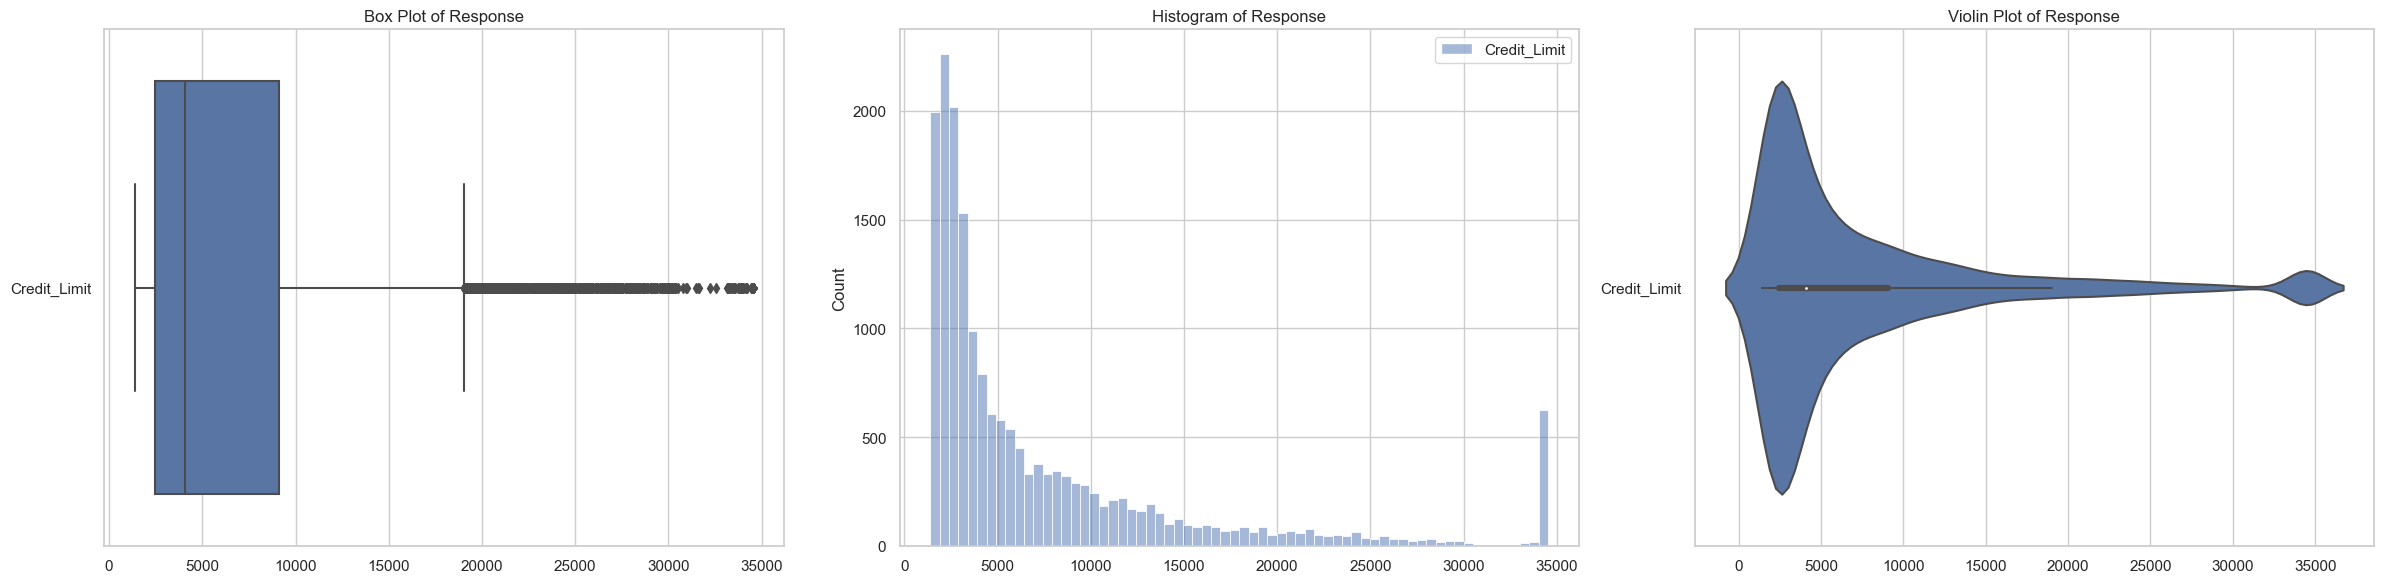

In [49]:
# Draw the distribution of Response
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sns.boxplot(data=Y_cla, orient="h", ax=axes[0])
sns.histplot(data=Y_cla, ax=axes[1])
sns.violinplot(data=Y_cla, orient="h", ax=axes[2])

# Add titles to the plots
axes[0].set_title("Box Plot of Response")
axes[1].set_title("Histogram of Response")
axes[2].set_title("Violin Plot of Response")

# Adjust spacing between subplots
plt.tight_layout()


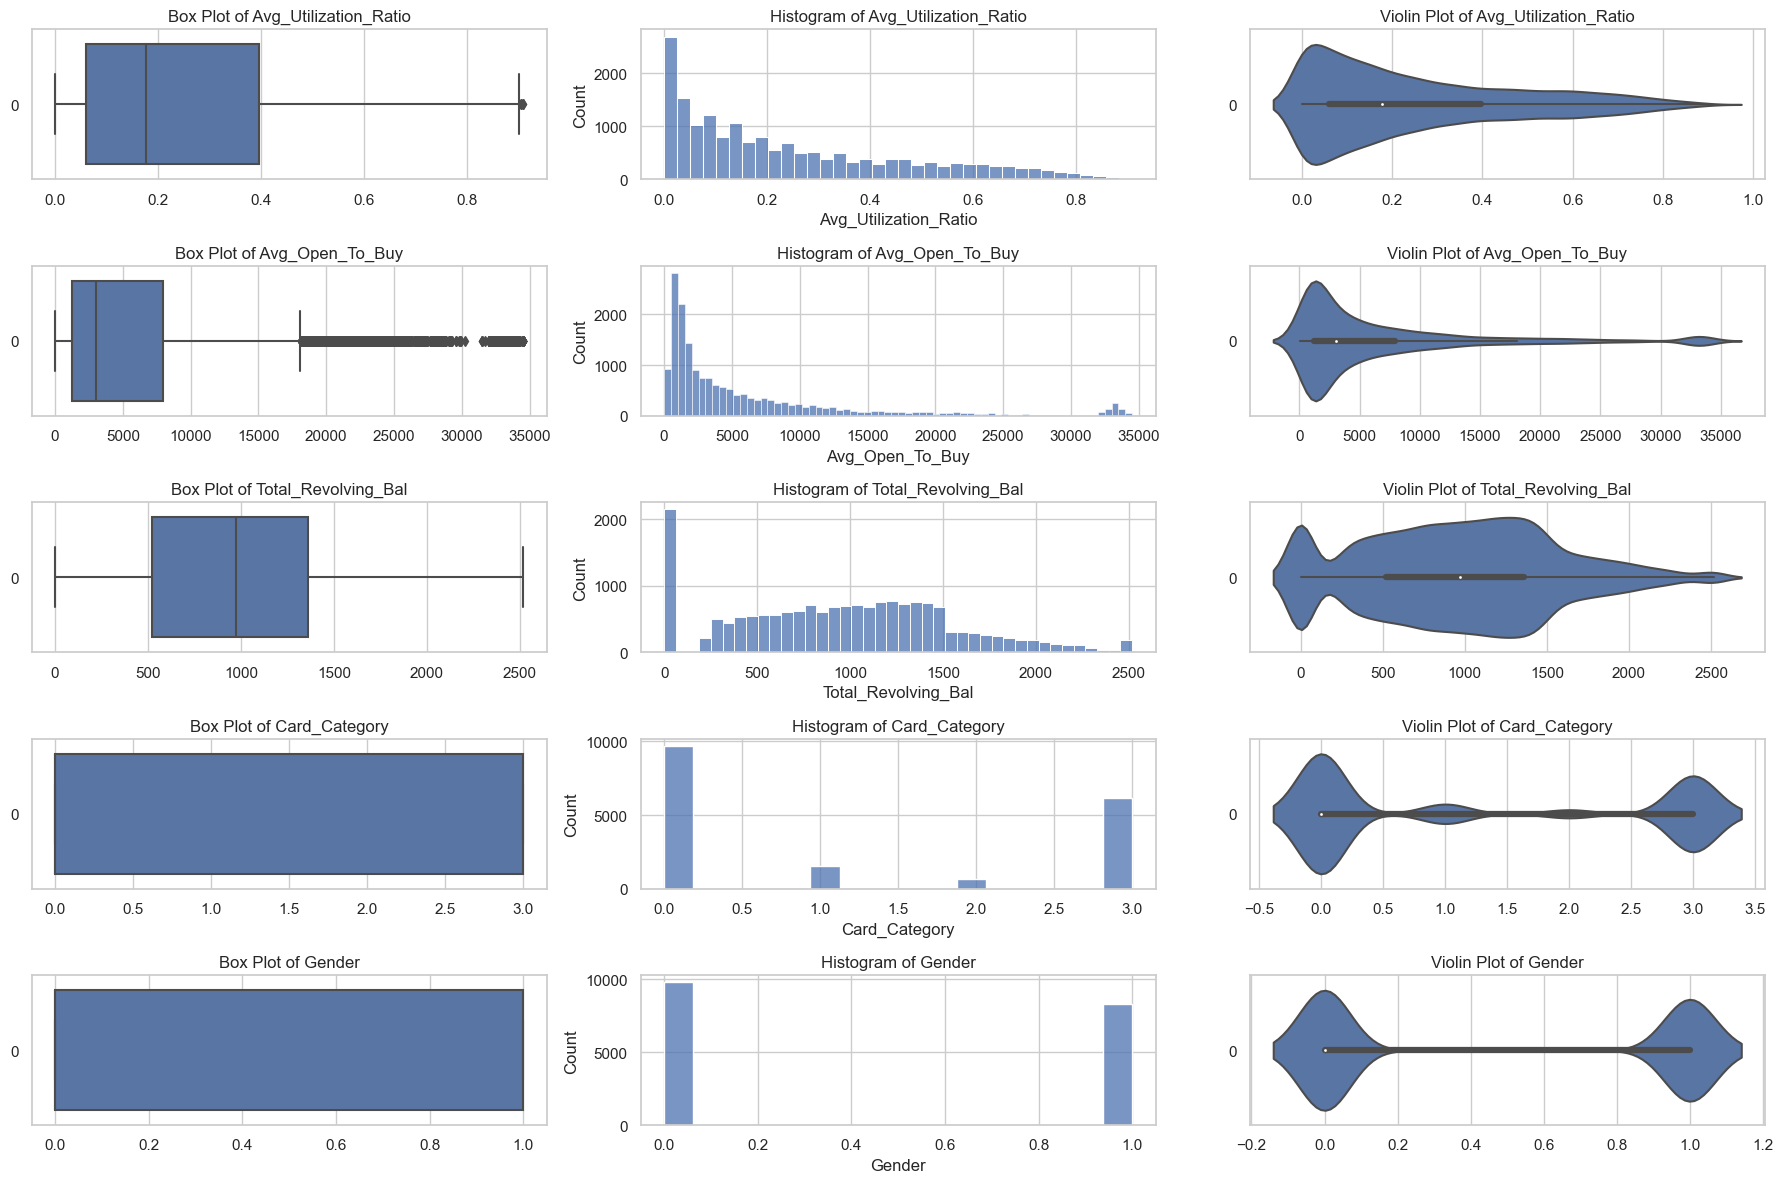

In [67]:
# Draw the distribution of all Predictors
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in X_cla:
    sns.boxplot(data=X_cla[var], orient="h", ax=axes[count, 0])
    sns.histplot(data=X_cla[var], ax=axes[count, 1])
    sns.violinplot(data=X_cla[var], orient="h", ax=axes[count, 2])
    
    # Add titles to the plots
    axes[count, 0].set_title(f"Box Plot of {var}")
    axes[count, 1].set_title(f"Histogram of {var}")
    axes[count, 2].set_title(f"Violin Plot of {var}")

    count += 1
    
# Adjust spacing between subplots
plt.tight_layout()

Intercept of Regression 	: b =  [507.49441894]
Coefficients of Regression 	: a =  [[-713.29204147    0.98461014    0.93644157  -24.54778399   57.18421508]]

              Predictors  Coefficients
0  Avg_Utilization_Ratio   -713.292041
1        Avg_Open_To_Buy      0.984610
2    Total_Revolving_Bal      0.936442
3          Card_Category    -24.547784
4                 Gender     57.184215



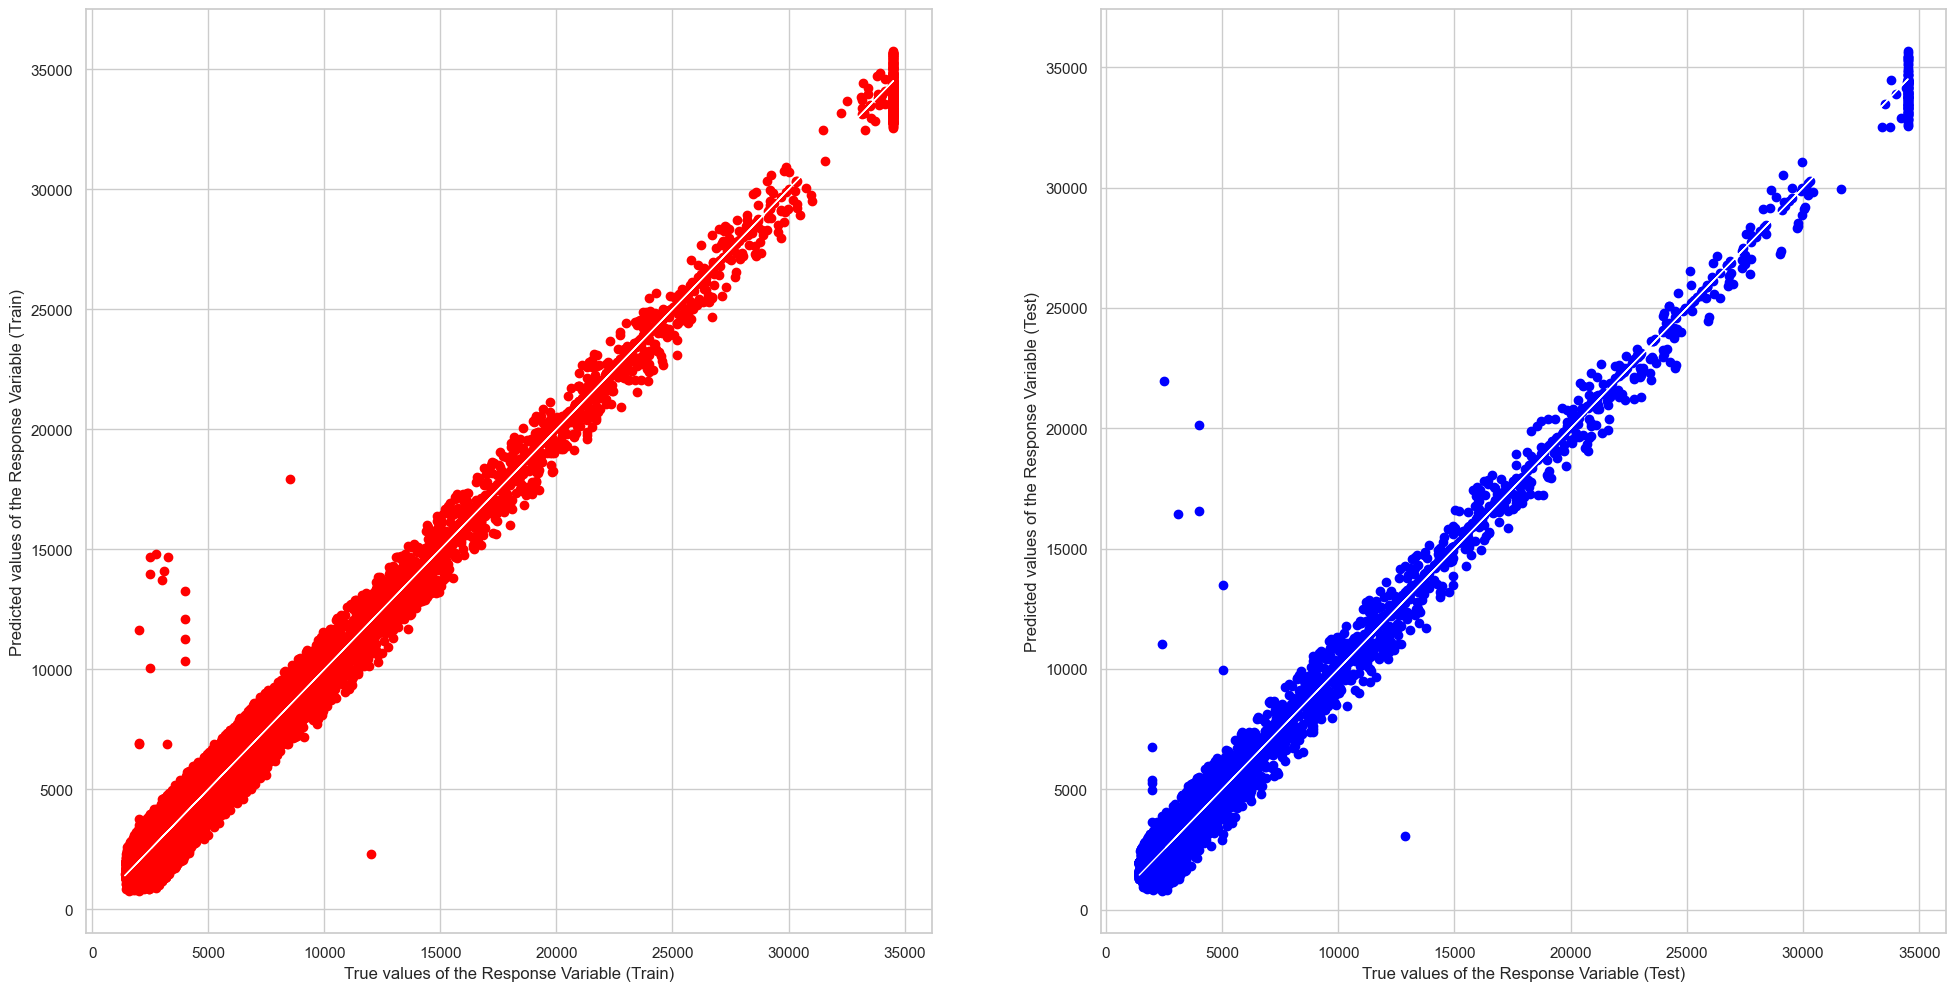

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9917580948190666
Mean Squared Error (MSE) 	: 489312.93800920673

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.989240613905949
Mean Squared Error (MSE) 	: 667497.1317903411



In [51]:
# Split the Dataset into Train and Test
X_train_cla, X_test_cla, Y_train_cla, Y_test_cla = train_test_split(X_cla, Y_cla, test_size = 0.25)

# Linear Regression using Train Data
linreg_cla = LinearRegression()
linreg_cla.fit(X_train_cla, Y_train_cla)

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_cla.intercept_)
print('Coefficients of Regression \t: a = ', linreg_cla.coef_)
print()

coefficients_cla_df = pd.DataFrame({
    "Predictors": X_train_cla.columns,
    "Coefficients": linreg_cla.coef_[0]
})
print(coefficients_cla_df)
print()

# Predict Response corresponding to Predictors
Y_train_pred_cla = linreg_cla.predict(X_train_cla)
Y_test_pred_cla = linreg_cla.predict(X_test_cla)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(Y_train_cla, Y_train_pred_cla, color = "red")
axes[0].plot(Y_train_cla, Y_train_cla, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(Y_test_cla, Y_test_pred_cla, color = "blue")
axes[1].plot(Y_test_cla, Y_test_cla, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_cla.score(X_train_cla, Y_train_cla))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_train_cla, Y_train_pred_cla))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_cla.score(X_test_cla, Y_test_cla))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Y_test_cla, Y_test_pred_cla))
print()

### The model explains approximately 98.87% of the variance in the response variable within the training data.
### The model explains approximately 98.92% of the variance in the response variable within the test data.

### On average, the squared difference between the model's predictions and the actual values in the training data is approximately 556780.17
### On average, the squared difference between the model's predictions and the actual values in the test data is approximately 536862.24

In [52]:
# Check coefficients for individual predictors
print(linreg_cla.coef_)

[[-713.29204147    0.98461014    0.93644157  -24.54778399   57.18421508]]


In [53]:
coef_Avg_Utilization_Ratio = linreg_cla.coef_[0][0]
coef_Avg_Open_To_Buy = linreg_cla.coef_[0][1]
coef_Total_Revolving_Bal = linreg_cla.coef_[0][2]

# Print or use the individual coefficients
print("Coefficient for Avg_Utilization_Ratio:", coef_Avg_Utilization_Ratio)
print("Coefficient for Avg_Open_To_Buy:", coef_Avg_Open_To_Buy)
print("Coefficient for Total_Revolving_Bal:", coef_Total_Revolving_Bal)

Coefficient for Avg_Utilization_Ratio: -713.2920414677146
Coefficient for Avg_Open_To_Buy: 0.9846101449931207
Coefficient for Total_Revolving_Bal: 0.9364415726695936


In [54]:
def adjust_credit_limit(avg_utilization_ratio, avg_open_to_buy, total_revolving_bal):
    # Calculate the adjusted credit limit
    adjustment = (
        coef_Avg_Utilization_Ratio * avg_utilization_ratio +
        coef_Avg_Open_To_Buy * avg_open_to_buy +
        coef_Total_Revolving_Bal * total_revolving_bal
    )
    return adjustment

In [55]:
# Create a list of adjusted credit limits using list comprehension
adjusted_credit_limit = [adjust_credit_limit(row['Avg_Utilization_Ratio'], row['Avg_Open_To_Buy'], row['Total_Revolving_Bal']) for _, row in AURdf.iterrows()]

# Add the adjusted credit limits as a new column in AURdf
AURdf['Adjusted_Credit_Limit'] = adjusted_credit_limit

# Add 'Credit_Limit_Difference' as a new column in AURdf
AURdf['Credit_Limit_Difference'] = AURdf['Adjusted_Credit_Limit'] - AURdf['Credit_Limit']

# Print or use the DataFrame with the 'Credit_Limit_Difference' column and 'Adjusted_Credit_Limits' column
print(AURdf)


       Credit_Limit  Avg_Open_To_Buy  Total_Revolving_Bal  Gender  \
0            1438.3            691.3                  747       0   
1            5756.0           5756.0                    0       0   
2            5756.0           5756.0                  990       0   
3            4315.0           3598.0                  393       0   
4            4315.0           3598.0                  717       0   
...             ...              ...                  ...     ...   
20066        5061.0          12833.0                  547       0   
20067        5061.0           5061.0                 1074       0   
20068        4109.0           4109.0                 1397       1   
20069        4246.0           1729.0                 1418       1   
20070        4000.0          12359.0                  707       1   

       Card_Category  Avg_Utilization_Ratio  Adjusted_Credit_Limit  \
0                  0                  0.519            1009.984278   
1                  3           

# Predict Card Utilisation Ratio

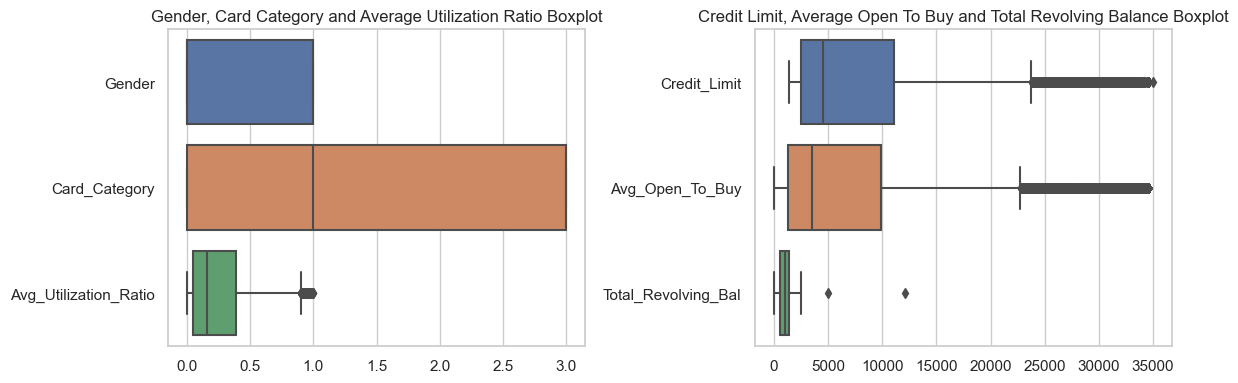

In [56]:
Small_Boxplot = pd.DataFrame(clientInfo_combined[["Gender", "Card_Category", "Avg_Utilization_Ratio"]])
Large_Boxplot = pd.DataFrame(clientInfo_combined[["Credit_Limit", "Avg_Open_To_Buy", "Total_Revolving_Bal"]])

# Create subplots to display both boxplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Small_Boxplot on the first subplot
sns.boxplot(data=Small_Boxplot, orient="h", ax=axes[0])
axes[0].set_title("Gender, Card Category and Average Utilization Ratio Boxplot")

# Plot the Large_Boxplot on the second subplot
sns.boxplot(data=Large_Boxplot, orient="h", ax=axes[1])
axes[1].set_title("Credit Limit, Average Open To Buy and Total Revolving Balance Boxplot")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [57]:
AUR_Predictors = ["Credit_Limit", "Avg_Open_To_Buy", "Total_Revolving_Bal", "Gender", "Card_Category", "Avg_Utilization_Ratio"]
X_AUR = pd.DataFrame(clientInfo_combined[AUR_Predictors])

In [58]:
# Define pairs of variables for scatterplots
scatterplotPairs = [
    ("Credit_Limit", "Avg_Utilization_Ratio"),
    ("Credit_Limit", "Avg_Open_To_Buy"),
    ("Total_Revolving_Bal", "Avg_Utilization_Ratio"),
    ("Avg_Open_To_Buy", "Avg_Utilization_Ratio"),
    ("Credit_Limit", "Gender"),
    ("Credit_Limit", "Card_Category"),
    ("Avg_Open_To_Buy", "Gender"),
    ("Avg_Open_To_Buy", "Card_Category"),
    ("Avg_Utilization_Ratio", "Card_Category"),
    ("Avg_Utilization_Ratio", "Gender")
]

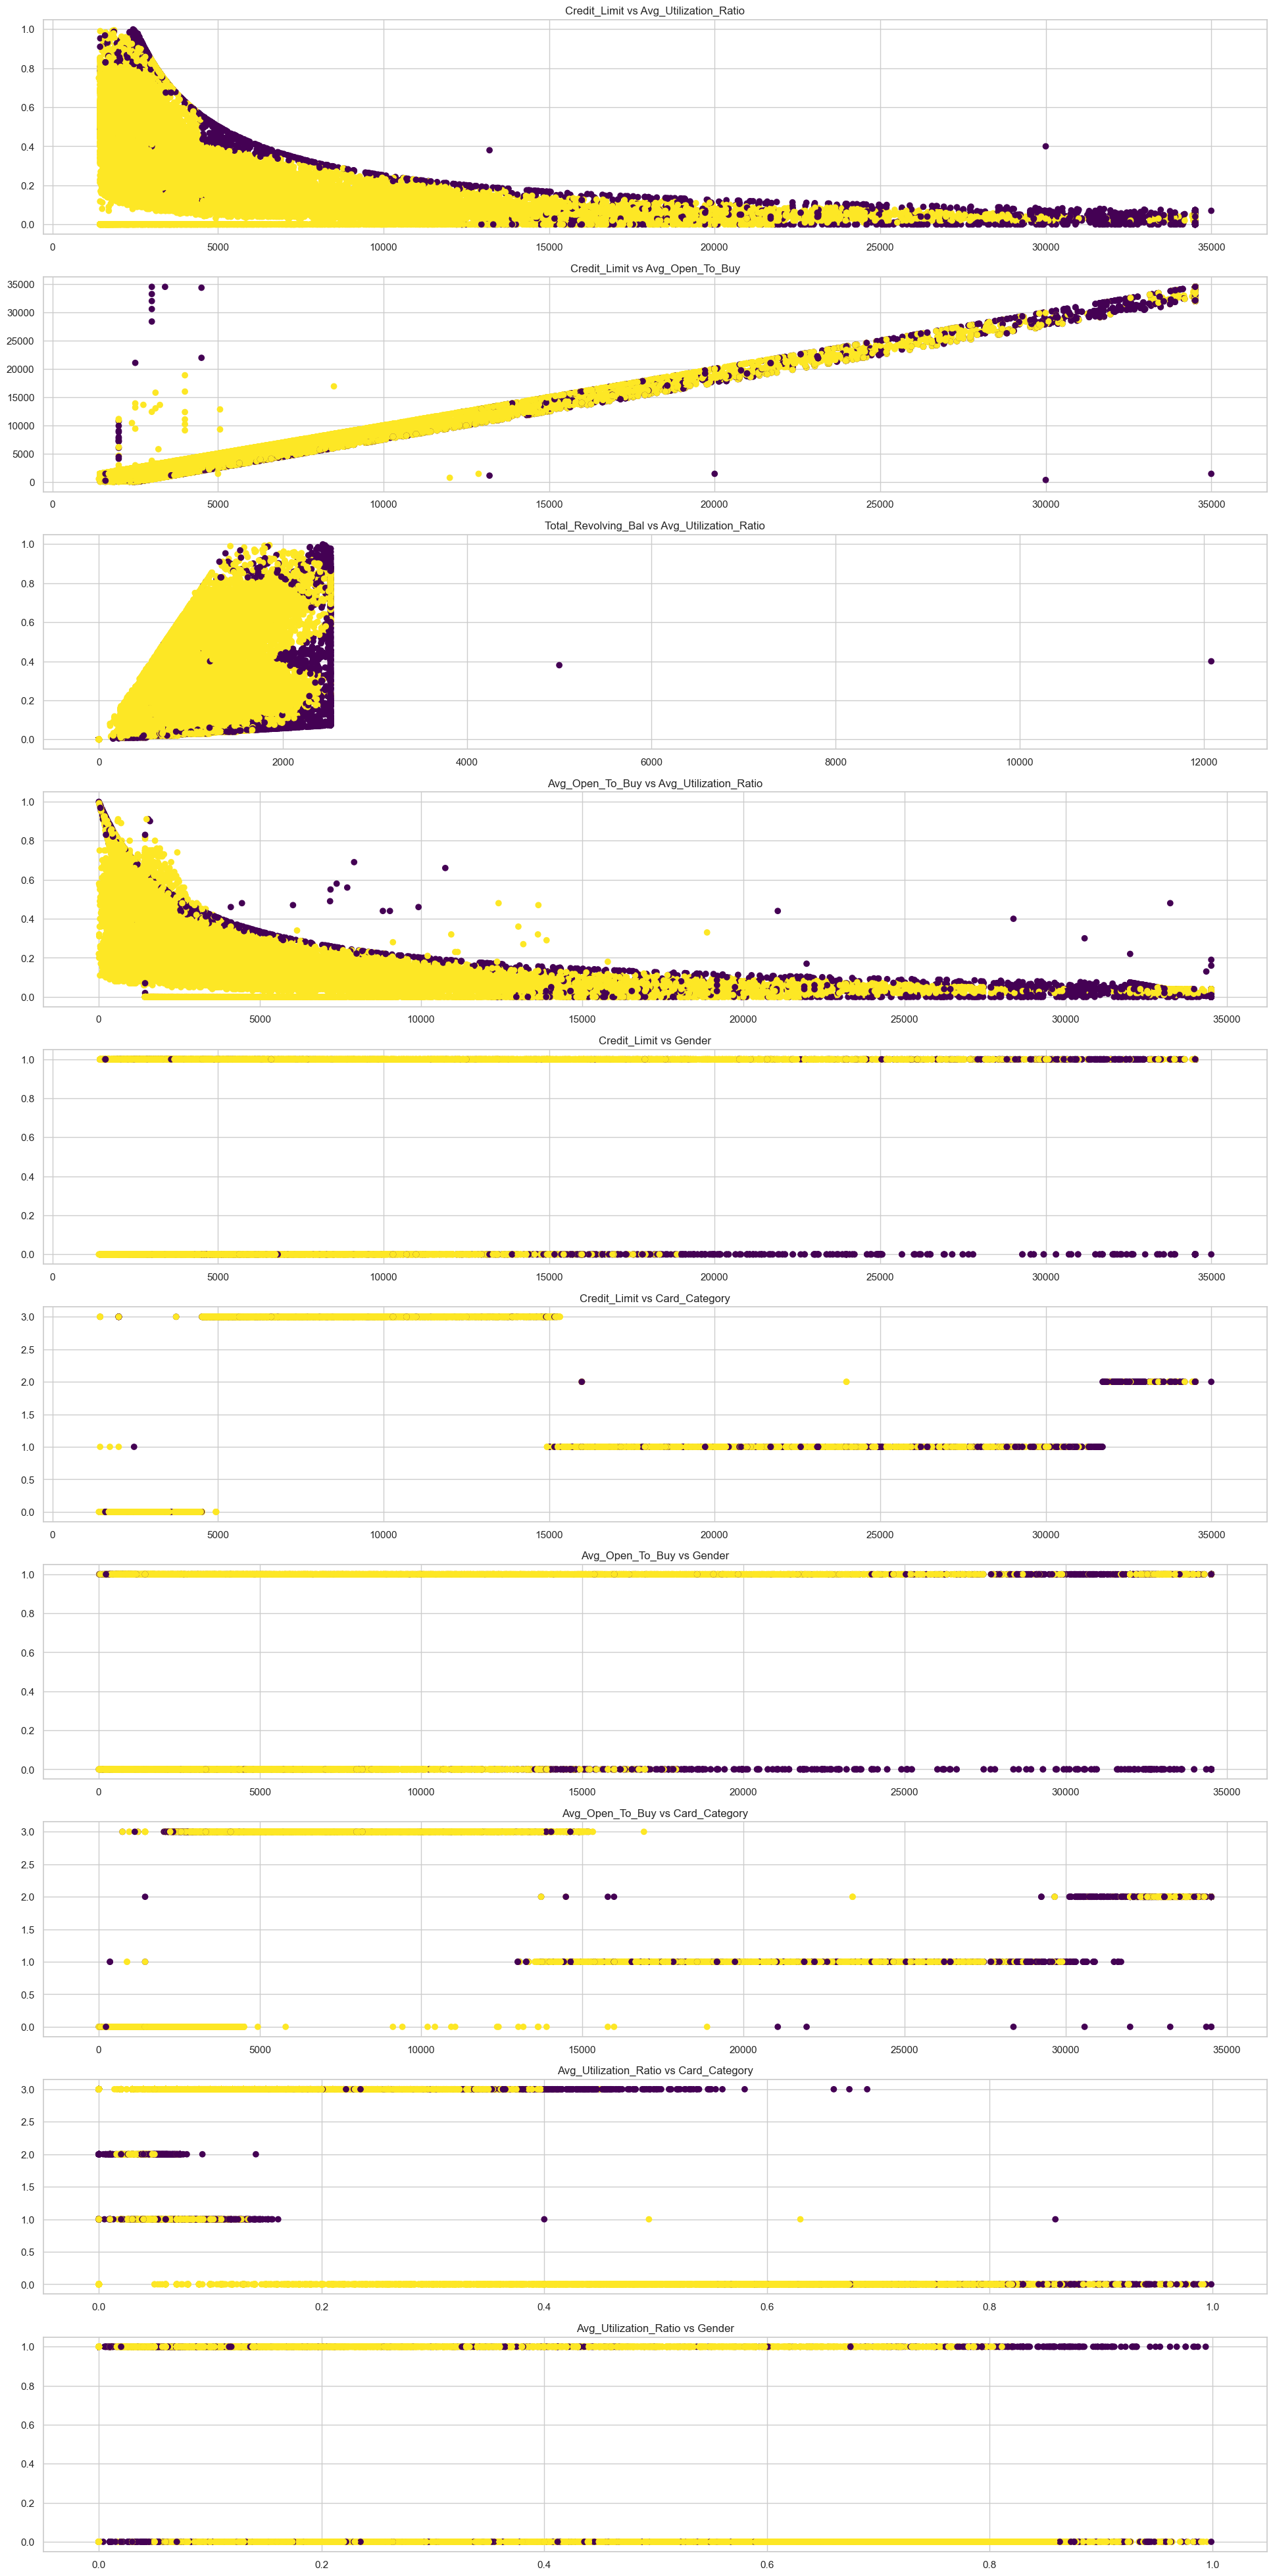

In [59]:
# Set the desired anomaly proportion
anomaly_proportion_AUR = 0.10

# Create an Isolation Forest
IF_AUR = IsolationForest(contamination=anomaly_proportion_AUR)

# Fit the Isolation Forest model to your data
IF_AUR.fit(X_AUR)

# Make predictions
labels_AUR = IF_AUR.predict(X_AUR)

X_AUR_labeled = clientInfo_combined.copy()

X_AUR_labeled["Cluster"] = pd.Categorical(labels_AUR)

# Create scatter plots using a loop
num_plots = len(scatterplotPairs)
fig, axes = plt.subplots(num_plots, figsize=(24, 50))

for i, (var1, var2) in enumerate(scatterplotPairs):
    axes[i].scatter(x=var1, y=var2, c="Cluster", cmap='viridis', data=X_AUR_labeled)
    axes[i].set_title(f"{var1} vs {var2}")

# Removing outliers from the dataset
inliers_AUR = X_AUR[labels_AUR == 1]  # Dataset contains only inliers


In [60]:
# New Data Frame without outliers
AURdf = pd.DataFrame(inliers_AUR)
AURdf.head()

Credit_Limit  Avg_Open_To_Buy  Total_Revolving_Bal  Gender  Card_Category  \
0        1438.3            691.3                  747       0              0   
1        5756.0           5756.0                    0       0              3   
2        5756.0           5756.0                  990       0              3   
3        4315.0           3598.0                  393       0              0   
4        4315.0           3598.0                  717       0              0   

   Avg_Utilization_Ratio  
0                  0.519  
1                  0.000  
2                  0.170  
3                  0.090  
4                  0.166

In [61]:
# Generate a statistical summary of the DataFrame AURdf
AURdf.describe()

Credit_Limit  Avg_Open_To_Buy  Total_Revolving_Bal        Gender  \
count  18064.000000     18064.000000         18064.000000  18064.000000   
mean    7303.312993      6173.890523           961.305746      0.456709   
std     7602.780696      7601.434278           590.692708      0.498136   
min     1400.000000         3.000000             0.000000      0.000000   
25%     2450.750000      1211.000000           527.000000      0.000000   
50%     4058.000000      3052.000000           978.000000      0.000000   
75%     9121.000000      8013.000000          1363.000000      1.000000   
max    34516.000000     34516.000000          2517.000000      1.000000   

       Card_Category  Avg_Utilization_Ratio  
count   18064.000000           18064.000000  
mean        1.174934               0.248417  
std         1.377913               0.228797  
min         0.000000               0.000000  
25%         0.000000               0.060000  
50%         0.000000               0.175000  
75%         3.000000               0.394000  
max         3.000000               0.995000

In [62]:
# Extract Response and Predictors
y_AUR = pd.DataFrame(AURdf["Avg_Utilization_Ratio"])
X_AUR = pd.DataFrame(AURdf[["Credit_Limit", "Total_Revolving_Bal", "Avg_Open_To_Buy", "Card_Category", "Gender"]])

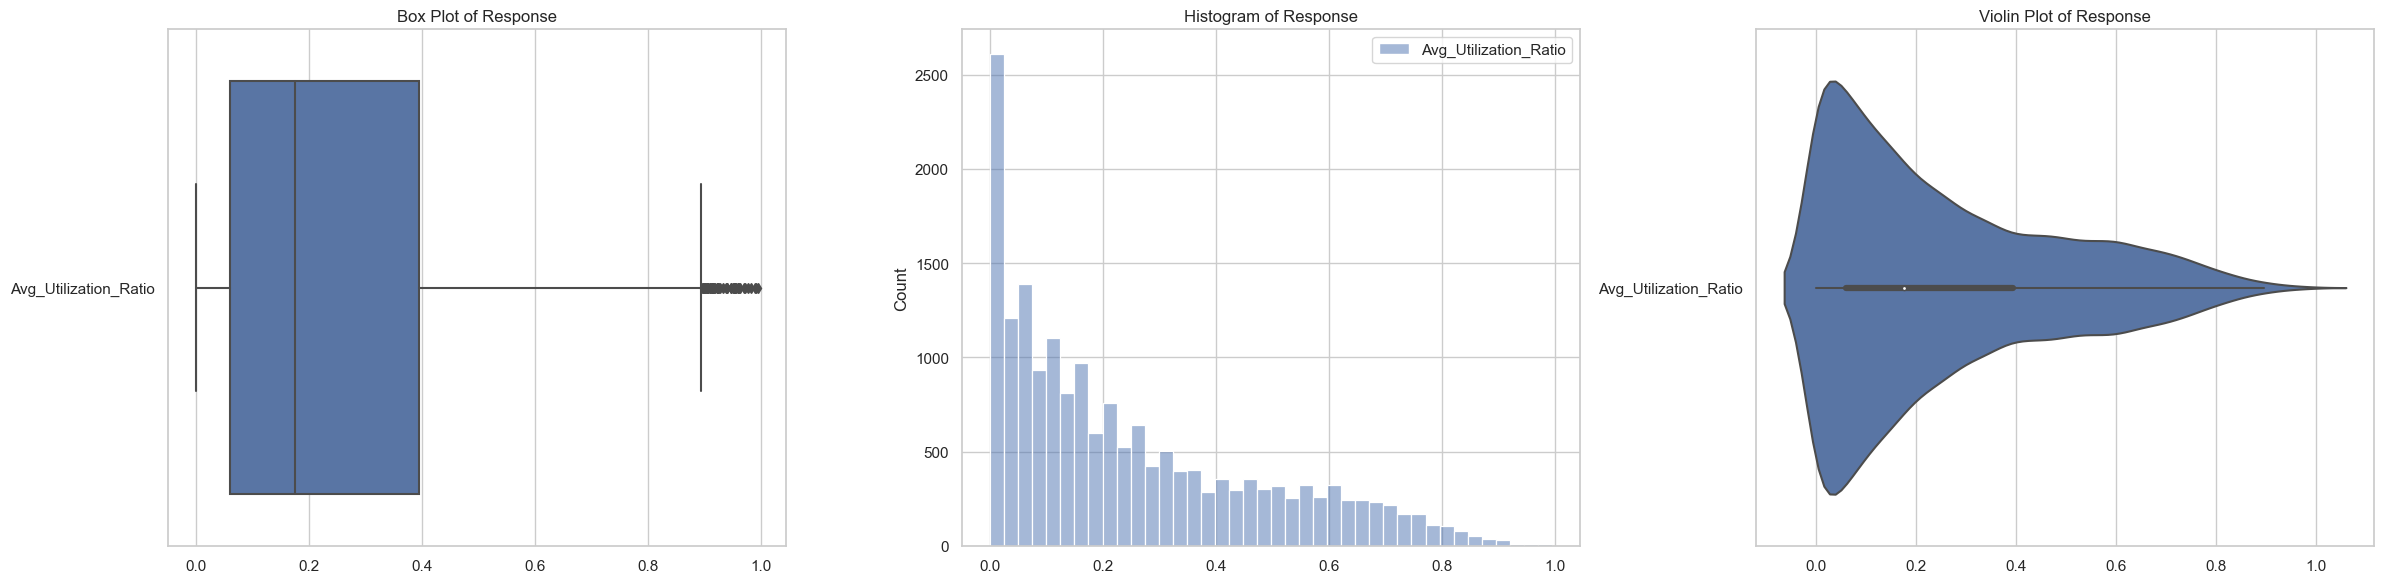

In [63]:
# Create a figure with three subplots
f, axes = plt.subplots(1, 3, figsize=(24, 6))

# Box plot
sns.boxplot(data=y_AUR, orient="h", ax=axes[0])
axes[0].set_title("Box Plot of Response")

# Histogram
sns.histplot(data=y_AUR, ax=axes[1])
axes[1].set_title("Histogram of Response")

# Violin plot
sns.violinplot(data=y_AUR, orient="h", ax=axes[2])
axes[2].set_title("Violin Plot of Response")

# Adjust spacing between subplots
plt.tight_layout()


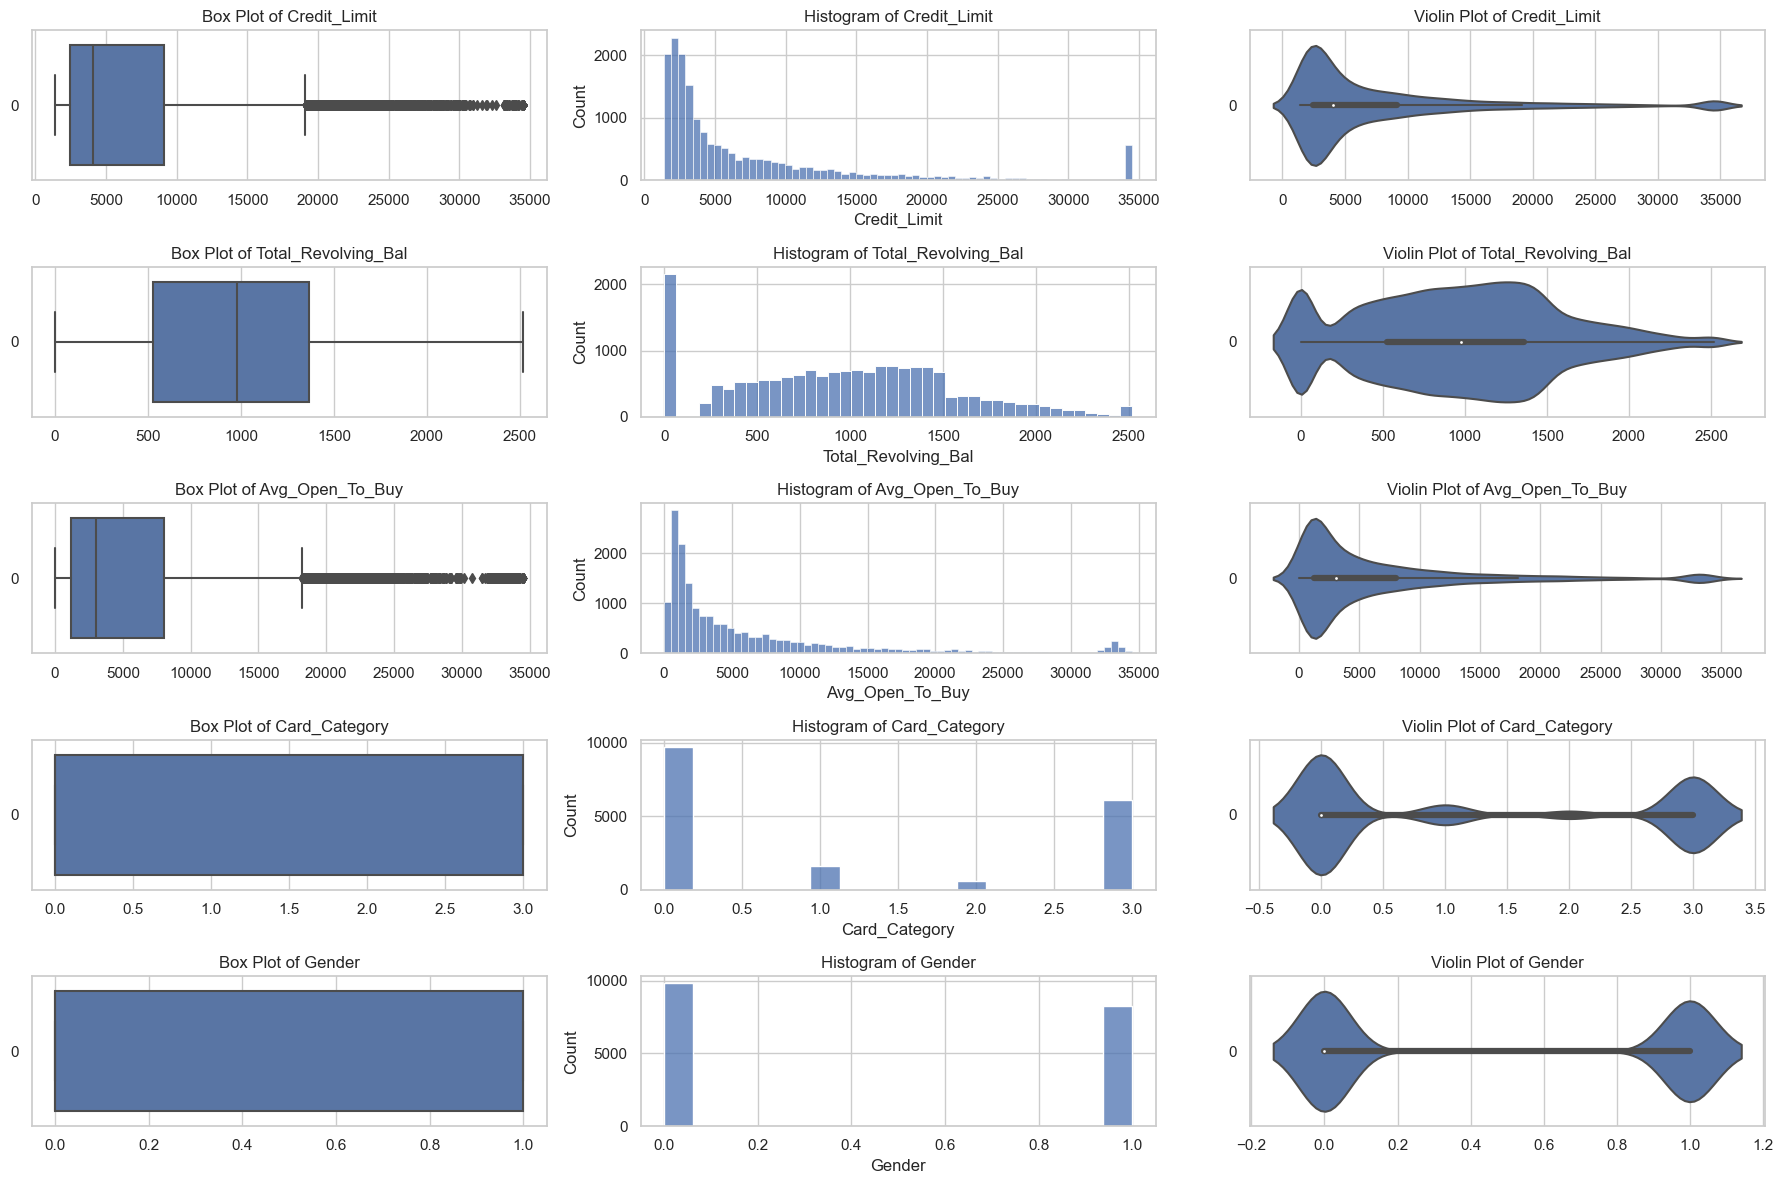

In [64]:
# Create a figure with subplots
f, axes = plt.subplots(5, 3, figsize=(18, 12))

count = 0
for var in X_AUR:
    # Box plot
    sns.boxplot(data=X_AUR[var], orient="h", ax=axes[count, 0])
    axes[count, 0].set_title(f"Box Plot of {var}")

    # Histogram
    sns.histplot(data=X_AUR[var], ax=axes[count, 1])
    axes[count, 1].set_title(f"Histogram of {var}")

    # Violin plot
    sns.violinplot(data=X_AUR[var], orient="h", ax=axes[count, 2])
    axes[count, 2].set_title(f"Violin Plot of {var}")

    count += 1

# Adjust spacing between subplots
plt.tight_layout()


Intercept of Regression: b =  [0.16458077]
Coefficients of Regression: a =  [[-1.72309112e-05  2.57527481e-04  6.19354530e-06 -5.73145358e-02
  -2.07637360e-02]]

            Predictors  Coefficients
0         Credit_Limit     -0.000017
1  Total_Revolving_Bal      0.000258
2      Avg_Open_To_Buy      0.000006
3        Card_Category     -0.057315
4               Gender     -0.020764



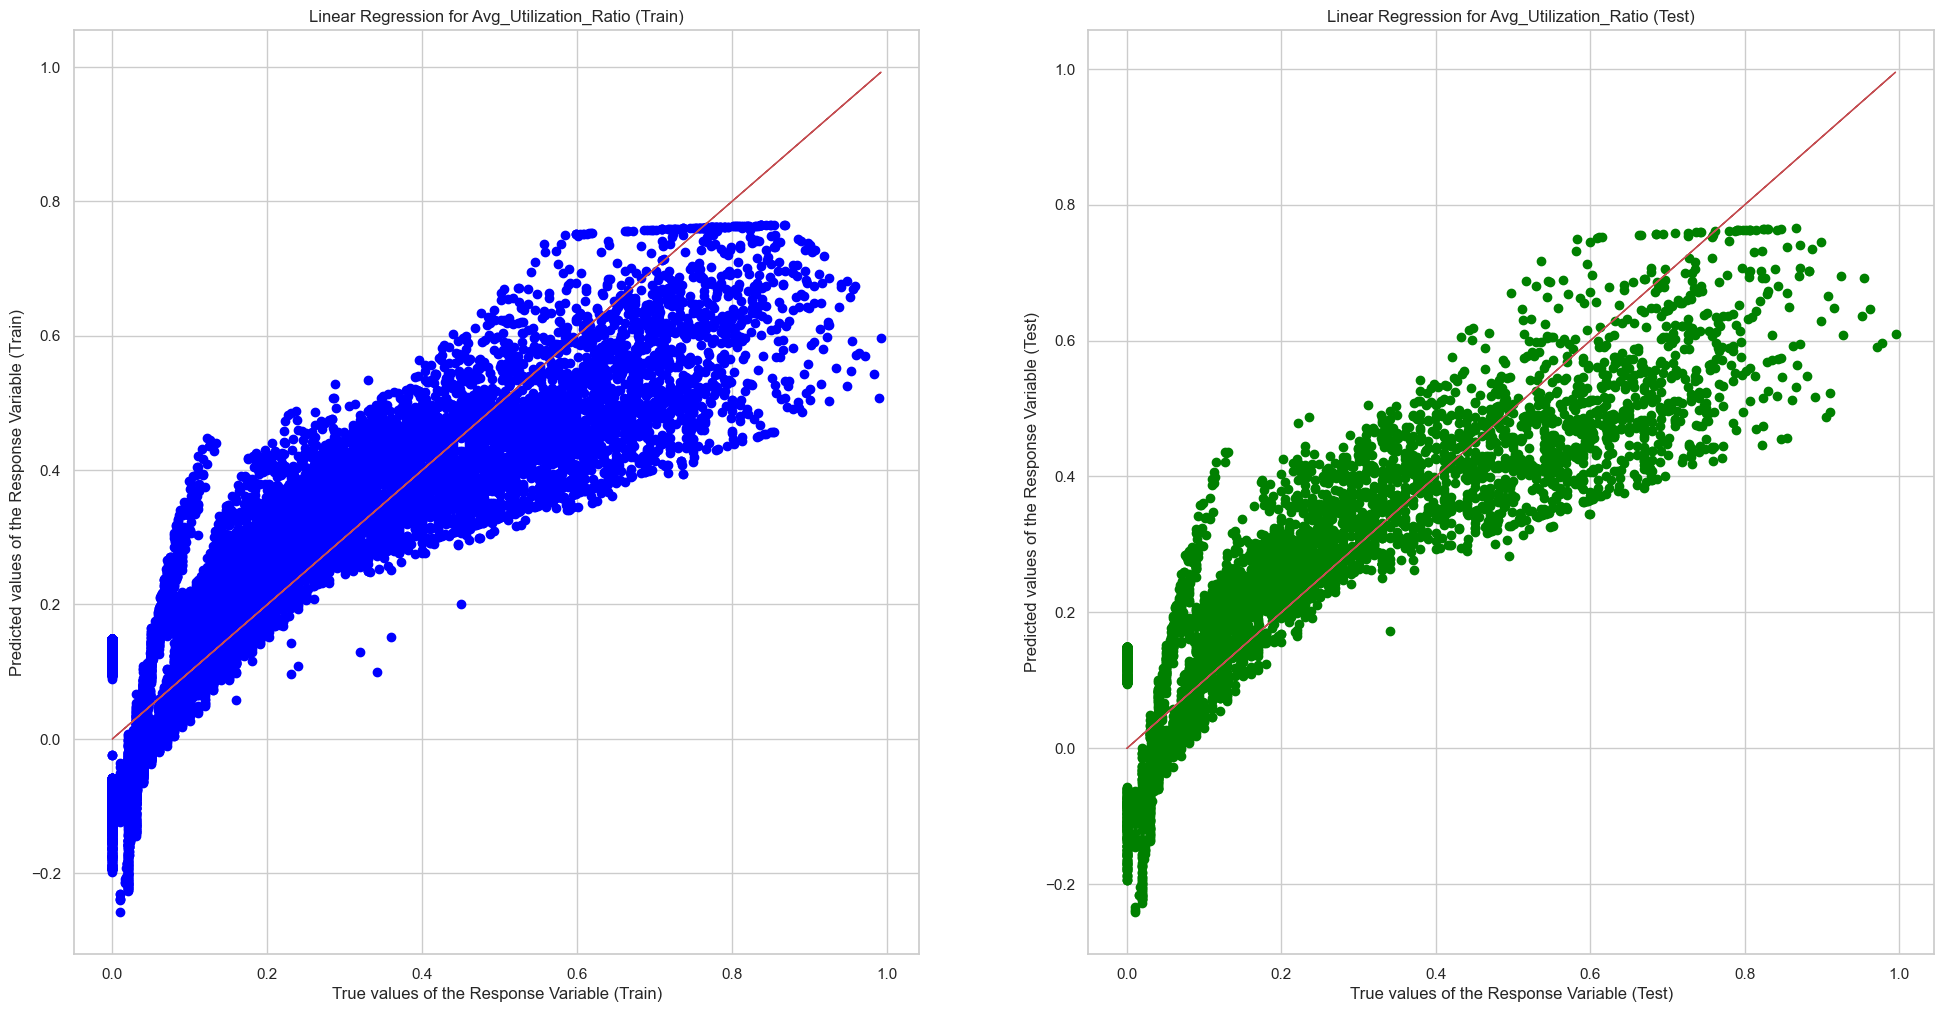

Goodness of Fit of Model on Train Dataset
Explained Variance (R^2): 0.7759714304127054
Mean Squared Error (MSE): 0.011664825918929473

Goodness of Fit of Model on Test Dataset
Explained Variance (R^2): 0.7726035123232149
Mean Squared Error (MSE): 0.012089408449493471



In [65]:
# Split the dataset into train and test
X_train_AUR, X_test_AUR, y_train_AUR, y_test_AUR = train_test_split(X_AUR, y_AUR, test_size=0.25)

# Create a linear regression model using the training data
linreg_AUR = LinearRegression()
linreg_AUR.fit(X_train_AUR, y_train_AUR)

# Print the coefficients of the linear regression line
print('Intercept of Regression: b = ', linreg_AUR.intercept_)
print('Coefficients of Regression: a = ', linreg_AUR.coef_)
print()

# Create a DataFrame to display coefficients and predictors
coefficients_df = pd.DataFrame({"Predictors": X_train_AUR.columns, "Coefficients": linreg_AUR.coef_[0]})
print(coefficients_df)
print()

# Predict the response variable corresponding to the predictors
y_train_pred_AUR = linreg_AUR.predict(X_train_AUR)
y_test_pred_AUR = linreg_AUR.predict(X_test_AUR)

# Create a figure with two subplots to visualize predictions vs. true values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train_AUR, y_train_pred_AUR, color="blue")
axes[0].plot(y_train_AUR, y_train_AUR, 'r-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[0].set_title("Linear Regression for Avg_Utilization_Ratio (Train)")

axes[1].scatter(y_test_AUR, y_test_pred_AUR, color="green")
axes[1].plot(y_test_AUR, y_test_AUR, 'r-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
axes[1].set_title("Linear Regression for Avg_Utilization_Ratio (Test)")
plt.show()

# Check the goodness of fit (on the training data)
print("Goodness of Fit of Model on Train Dataset")
print("Explained Variance (R^2):", linreg_AUR.score(X_train_AUR, y_train_AUR))
print("Mean Squared Error (MSE):", mean_squared_error(y_train_AUR, y_train_pred_AUR))
print()

# Check the goodness of fit (on the test data)
print("Goodness of Fit of Model on Test Dataset")
print("Explained Variance (R^2):", linreg_AUR.score(X_test_AUR, y_test_AUR))
print("Mean Squared Error (MSE):", mean_squared_error(y_test_AUR, y_test_pred_AUR))
print()


## The explained variance of both train and test dataset is approximately 0.77 which shows that the prediction for the card utilization ratio is reasonably accurate.

# References

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
https://www.educative.io/blog/one-hot-encoding#what
https://notebook.community/fcollonval/coursera_data_visualization/Chi-Square_Test 
https://stackoverflow.com/questions/42196589/any-way-to-get-mappings-of-a-label-encoder-in-python-pandas
https://medium.com/geekculture/the-power-of-crosstab-function-in-pandas-for-data-analysis-and-visualization-6c085c269fcd
https://stackoverflow.com/questions/21247203/how-to-make-a-pandas-crosstab-with-percentages 
https://www.askpython.com/python/examples/chi-square-test 
https://faun.pub/confusion-matrix-performance-evaluator-of-classifier-ac60325c88bb
https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
https://www.v7labs.com/blog/f1-score-guide#:~:text=F1%20score%20is%20a%20machine%20learning%20evaluation%20metric%20that%20measures,prediction%20across%20the%20entire%20dataset.
https://www.equifax.com/personal/education/debt-management/articles/-/learn/credit-utilization-ratio/ 
https://www.investopedia.com/terms/c/credit_limit.asp
https://www.creditcards.com/glossary/term-revolving-balance/
https://merchantservicesnewjersey.com/definitions/open-to-buy/#:~:text=The%20difference%20between%20the%20credit,present%20balance%20on%20the%20account. 

# **Notes**

OneHotEncoder converts categorical data into numeric values (similar to binary format with only 1s or 0s).